In [15]:
# %matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import pylab
import math
import sys
import operator
import inspect
import lmfit
from lmfit import Model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy import signal
from scipy import fftpack
from scipy.integrate import trapz
from operator import itemgetter
from skimage import util
from scipy import stats
from numpy import NaN, Inf, arange, isscalar, asarray, array
##################################################    PEAK DETECTOR     ###############################################
def peakdet(v, delta, x = None):
    maxtab = []
    mintab = []
       
    if x is None:
        x = arange(len(v))
    
    v = asarray(v)
    
    if len(v) != len(x):
        sys.exit('Input vectors v and x must have same length')
    
    if not isscalar(delta):
        sys.exit('Input argument delta must be a scalar')
    
    if delta <= 0:
        sys.exit('Input argument delta must be positive')
    
    mn, mx = Inf, -Inf
    mnpos, mxpos = NaN, NaN
    
    lookformax = True
    
    for i in arange(len(v)):
        this = v[i]
        if this > mx:
            mx = this
            mxpos = x[i]
        if this < mn:
            mn = this
            mnpos = x[i]
        
        if lookformax:
            if this < mx-delta:
                maxtab.append((mxpos, mx))
                mn = this
                mnpos = x[i]
                lookformax = False
        else:
            if this > mn+delta:
                mintab.append((mnpos, mn))
                mx = this
                mxpos = x[i]
                lookformax = True

    return array(maxtab), array(mintab)
##################################################    FITTING MODELS     ##############################################

def model(t, decay):  # , omega, resid):
    return np.exp(-t/decay)  # * np.cos(omega * t) + resid
gmodel = lmfit.Model(model)
def line(x, slope, intercept):
    """a line"""
    return 10**((slope*np.log(x))-intercept)
mod = Model(line)

def line2(x, slope, intercept):
    """a line"""
    return slope*x+intercept


def adjust_yaxis(ax,ydif,v):
    """shift axis ax by ydiff, maintaining point v at the same location"""
    inv = ax.transData.inverted()
    _, dy = inv.transform((0, 0)) - inv.transform((0, ydif))
    miny, maxy = ax.get_ylim()
    miny, maxy = miny - v, maxy - v
    if -miny>maxy or (-miny==maxy and dy > 0):
        nminy = miny
        nmaxy = miny*(maxy+dy)/(miny+dy)
    else:
        nmaxy = maxy
        nminy = maxy*(miny+dy)/(maxy+dy)
    ax.set_ylim(nminy+v, nmaxy+v)
    
def align_yaxis(ax1, v1, ax2, v2):
    """adjust ax2 ylimit so that v2 in ax2 is aligned to v1 in ax1"""
    _, y1 = ax1.transData.transform((0, v1))
    _, y2 = ax2.transData.transform((0, v2))
    adjust_yaxis(ax2,(y1-y2)/2,v2)
    adjust_yaxis(ax1,(y2-y1)/2,v1)

#################################################    NAME RETREIVER     ###############################################

def retrieve_name(var):
        """
        Gets the name of var. Does it from the out most frame inner-wards.
        :param var: variable to get name from.
        :return: string
        """
        for fi in reversed(inspect.stack()):
            names = [var_name for var_name, var_val in fi.frame.f_locals.items() if var_val is var]
            if len(names) > 0:
                return names[0]
            
###################################################    VALUE FINDER     ###############################################
            
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

#######################################################################################################################
####################################################    FUNCTIONS     #################################################
#######################################################################################################################

run = ['001','002','003','004','005','006','007','008','009','010',
       '011','012','013','014','015','016','017','018','019','020', 
       '021','022','023','024','025','026','027','028','029','030',
       '031','032','033','034','035','036','037','038','039','040',
       '041','042','043','044','045','046','047','048','049','050',
       '051','052','053','054','055','056','057','058','059','060',
       '061','062','063','064','065','066','067','068','069','070',
       '071','072','073','074','075','076','077','078','079','080',
       '081','082','083','084','085','086','087','088','089','090',
       '091','092','093','094','095','096','097','098','099','100',
       '101','102','103','104','105','106','107','108','109','110',
       '111','112','113','114','115','116','117','118','119','120',
       '121','122','123','124','125','126','127','128','129','130',
       '131','132','133','134','135','136','137','138','139','140',
       '141','142','143','144','145','146','147','148','149','150',
       '151','152','153','154','155','156','157','158','159','160',
       '161','162','163','164','165','166','167','168','169','170',
       '171','172','173','174','175','176','177','178','179','180',
       '181','182','183','184','185','186','187','188','189','190','191']

#################################################     DIAGPLOTTER     ##############################################

def diag_plotter(kx, my_data, alldata=False, fig=True):
    
    integ = my_data[0, :]
    rmsvl = my_data[1, :]
    decay = my_data[2, :]
    osrat = my_data[3, :]
    burat = my_data[4, :]
    g1rat = my_data[5, :]
    g2rat = my_data[6, :]
    dcrat = my_data[7, :]
    perid = my_data[8, :]
    perbd = my_data[9, :]
    pekti = my_data[10, :]
    
    if fig == True:
        fig = plt.figure(figsize=(30, 20))
    else:
        fig = fig
        
    ax1 = fig.add_subplot(331)
    ax2 = fig.add_subplot(332)
    ax3 = fig.add_subplot(333)
    ax4 = fig.add_subplot(334)
    ax5 = fig.add_subplot(335)
    ax6 = fig.add_subplot(336)
    ax7 = fig.add_subplot(337)
    ax8 = fig.add_subplot(338)
    ax9 = fig.add_subplot(339)


    ########  top
    ax1.plot(kx, integ)
    ax2.plot(kx, rmsvl)
    ax3.plot(kx, decay)
    
    #ax1.set_xlabel('$k_{x} \\rho_{ti}$')
    #ax2.set_xlabel('$k_{x} \\rho_{ti}$')
    #ax3.set_xlabel('$k_{x} \\rho_{ti}$')

    ax1.title.set_text('Integral')
    ax2.title.set_text('RMS value')
    ax3.title.set_text('Decay length')

    ########  mid
    ax4.plot(kx, osrat)
    ax5.plot(kx, g2rat, label='Growth ratio')
    ax5.plot(kx, dcrat, label='Decay ratio')
    ax6.plot(kx, pekti, label='{0}'.format(retrieve_name(my_data)))
    
    #ax4.set_xlabel('$k_{x} \\rho_{ti}$')
    #ax5.set_xlabel('$k_{x} \\rho_{ti}$')
    #ax6.set_xlabel('$k_{x} \\rho_{ti}$')
    
    ax4.title.set_text('Overshoot ratio')
    # ax5.title.set_text('')
    ax6.title.set_text('Peak time')
    ax6.legend(loc="upper right")
    ax5.legend(loc="lower right")
    
    ########  bottom
    #ax3.title.set_text('RMS')
    ax7.plot(kx, g1rat)
    ax8.plot(kx, burat)
    ax9.plot(kx, perid, label='Decay Period')
    ax9.plot(kx, perbd, label='Bump Period')
    
    ax7.title.set_text('Bump growth ratio')
    ax8.title.set_text('Bump ratio')
    # ax9.title.set_text('Period')
    ax9.legend(loc="upper right")
    
    ax7.set_xlabel('$k_{x} \\rho_{ti}$')
    ax8.set_xlabel('$k_{x} \\rho_{ti}$')
    ax9.set_xlabel('$k_{x} \\rho_{ti}$')

    if alldata == False:
        fig.show()

    return fig
###############################################    TROUBLESHOOTER    ##################################################

def troubleshooter(E, t, f_s, label, spectrogram=False):
    
    fig = plt.figure(figsize=(13, 6.5))
    ax2 = fig.add_subplot(111)
    #ax2.set_ylim(-2, 2)
    #ax2.set_xlim(0, 500)
    ax2.plot(t, E, label='{0}'.format(label))
    ax2.axhline(y=0, color='black', linestyle='dashed')
    
    maxtab, mintab, OS, BR, GR1, GR2, DR, PE, PE2, TP, a, b1, b2, e, i, o = nucleus(E, t, label, diag=True)
    
    if type(b1) == float and type(o) != float:
        n = ['a', 'e', 'i', 'o']
        x = np.array([a, e, i, o])[:,1]
        y = np.array([a, e, i, o])[:,0]
    elif type(b1) != float and type(o) == float:
        n = ['a', 'b1', 'b2', 'e', 'i']
        x = np.array([a, b1, b2, e, i])[:,1]
        y = np.array([a, b1, b2, e, i])[:,0]
    else:
        n = ['a', 'b1', 'b2', 'e', 'i', 'o']
        x = np.array([a, b1, b2, e, i, o])[:,1]
        y = np.array([a, b1, b2, e, i, o])[:,0]
    ax2.scatter(y,x, color='blue')
    for r, txt in enumerate(n):
        ax2.annotate(txt, (y[r], x[r]))
    ax2.scatter(e[0], e[1], color='green')
    ax2.scatter(maxtab[:, 0], maxtab[:, 1], color='red')
    ax2.scatter(mintab[:, 0], mintab[:, 1], color='blue')
    #ax2.set_xlim(-10, 100)
    print('Overshoot ratio (OS): ' + str(OS))
    print('Bump ratio (BR): ' + str(BR))
    print('Bump growth ratio (GR1): ' + str(GR1))
    print('2nd growth ratio (GR2): ' + str(GR2))
    print('Period (PE): ' + str(PE))
    print('Peak time (TP): ' + str(TP))
    
    if spectrogram == True:
            ########  SPECTROGRAM
            M = 1024
            slices = util.view_as_windows(E, window_shape=(M,), step=2)
            win = np.hanning(M + 1)[:-1]
            slices = slices * win
            slices = slices.T
            spectrum = np.fft.fft(slices, axis=0)[:M // 2 + 1:-1]
            spectrum = np.abs(spectrum)
            S = np.abs(spectrum)
            S = 20 * np.log10(S / np.max(S))
            plt.figure(figsize=(13, 6.5))
            plt.imshow(S, origin='lower', cmap='viridis')
            plt.title(str(label), fontsize=30)
            plt.axis('tight')
            plt.ylabel('Frequency [Hz]')
            plt.xlabel('Time ($a / v_{ti}$)')
            plt.ylim([0, 100])
    plt.show()
    
    return 
##################################################    NUCLEUS     #################################################
    
def nucleus(E, t, label, diag=False):
    # Peak detection
    maxtab, mintab = peakdet(E, 0.001, x=t)
    
    # A fitting to the peak values to get the decay coefficient:
    result = gmodel.fit(E[:150], t=t[:150], decay=10, nan_policy='propagate')

    # Can you guess the residual?
    if 0.95 <= np.abs(E[-1]/mintab[0, 1]) <= 1.02:
        print('residual? :' + str(mintab[0, 1]))
        
    # Maxpeaks
    a = maxtab[0, :]  # Initial point
    
    if np.shape(maxtab) != (2, 2):  # If there are more points than a and i:
        b1 = maxtab[1, :]  # Second Peak
        i = maxtab[2, :]            
    elif np.shape(maxtab) == (2, 2):
        i = maxtab[1, :]
        b1 = i
        print('i point is the first one')     
    
    # Minpeaks
    b2 = mintab[0, :]  # (Technically) The lowest point
        
    min_index, min_value = min(enumerate(mintab[:, 1]), key=operator.itemgetter(1))  
    f = mintab[min_index, :]  # This determines the minimum peak
    
    if np.shape(mintab) != (1, 2):
        e = mintab[1, :]
    else:
        e = f

    # The initial bump is not detected if the points e & i are both > 0.32
    if b1[0] > 60:
        i = b1
        if i[1] < 0:
            i = maxtab[2, :]
        e = b2
        b1, b2, BR = np.nan, np.nan, np.nan
        GR1, GR2, PE2 = np.nan, np.nan, np.nan
    else:
        BR = np.abs(b2[1] / a[1])                      # Bump ratio
        GR1 = np.abs((e[1]-a[1]) / (b2[1]-a[1]))       # Bump growth ratio
        GR2 = np.abs(e[1] / b2[1])                     # Growth ratio
        PE2 = np.abs(e[0] - b2[0])                     # Bump period

    if isinstance(b2, float) and np.shape(mintab) != (1, 2):  # if b2 does not exist and mintab has more than 1 point
        o = mintab[1, :]
        if o[0] < i[0]:
            o = mintab[2, :]
        DR = np.abs(o[1] / e[1])                       # Decay ratio
        PE = np.abs(o[0] - e[0])                       # Decay period
    elif isinstance(b2, float) == False and np.shape(mintab)[0] >=3:  # if b2 exists and the shape of mintab is >=3
        o = mintab[2, :]
        DR = np.abs(o[1] / e[1])  # Decay ratio
        PE = np.abs(o[0] - e[0])  # Decay period
    else:
        o = np.nan
        DR = np.nan  # Decay ratio
        PE = np.nan  # Decay period

    TP = e[0]                                          # Peak time
    OS = np.abs(e[1] / a[1])                           # Overshoot ratio
            
    if diag == True:
        print('Diag mode on')
        
        return maxtab, mintab, OS, BR, GR1, GR2, DR, PE, PE2, TP, a, b1, b2, e, i, o
    else:

        return result, OS, BR, GR1, GR2, DR, PE, PE2, TP
##############################################    DIAGNOSTIC TOOL     #############################################

def diag(filename, minlim=None, maxlim=None, spectrogram=False, plot=False, my_data=None, k=None, Lx=None, nkx0=None, omt=None, mxtime=None):
    
    kx_ind = np.linspace((np.pi*2/Lx), (np.pi*2/Lx)*((nkx0//2)), (nkx0//2))
    if omt == 6:
        Q = [( pylab.loadtxt('./{0}/ITGa_NL/omt6/diag_ing/nrgsummaryions_act.dat'.format(filename),usecols = (0, 2)))][0]
    elif omt == 10:
        Q = [( pylab.loadtxt('./{0}/ITGa_NL/omt10/diag_ing/nrgsummaryions_act.dat'.format(filename),usecols = (0, 2)))][0]
        
    if omt == 6:
        nl_gam = [( pylab.loadtxt('./{0}/ITGa_NL/omt6/diag_ing/gamdiagions_act.dat'.format(filename),usecols = (0, 1)))][0]
    elif omt == 10:
        nl_gam = [( pylab.loadtxt('./{0}/ITGa_NL/omt10/diag_ing/gamdiagions_act.dat'.format(filename),usecols = (0, 1)))][0]
    
    if isinstance(maxlim, int) == False:
        kx = []
        nummy = []
        for n in maxlim:
            kx.append(kx_ind[n-1])
            nummy.append(run[n-1])
    else:
        if maxlim is not None and minlim is None:
            nummy = run[0:maxlim]
            if k is not None:
                kx = kx_ind[k:(maxlim+k)]
            else:
                kx = kx_ind[0:maxlim]
        elif minlim is not None and maxlim is None:
            nummy = run[minlim:len(run)]
            kx = kx_ind[minlim:len(run)]
        elif minlim is not None and maxlim is not None:
            nummy = run[minlim:maxlim]
            if k is not None:
                kx = kx_ind[(k+minlim):(maxlim+k)]
            else:
                kx = kx_ind[minlim:maxlim]
        if minlim is None and maxlim is None:
            nummy = run
            kx = kx_ind
    
    dataset = [('./{0}/GAM/gamdiagions_0{1}.dat'.format(filename, index), index) for index in nummy]     
    datalist = [ ( pylab.loadtxt(datapath), label) for datapath, label in dataset]  # Load the .dat files as an array

    if plot == True and type(my_data) == type(None):
        fig, ax1 = plt.subplots(figsize=(13, 7))
        ax2 = ax1.twinx()
        #plt.title("{0}".format(filename), fontsize=30)
        #plt.xscale('log')
        ax1.set_xlabel('Time ($a / v_{ti}$)',fontsize=16)
        ax1.set_ylabel('$\phi (t) / \phi (0)$',fontsize=16)
    
    if type(my_data) == type(None):
        integ = []
        rmsvl = []
        decay = []
        osrat = []
        burat = []
        g1rat = []
        g2rat = []
        dcrat = []
        perid = []
        perbd = []
        pekti = []
    else:
        integ = my_data[0, :].tolist()
        rmsvl = my_data[1, :].tolist()
        decay = my_data[2, :].tolist()
        osrat = my_data[3, :].tolist()
        burat = my_data[4, :].tolist()
        g1rat = my_data[5, :].tolist()
        g2rat = my_data[6, :].tolist()
        dcrat = my_data[7, :].tolist()
        perid = my_data[8, :].tolist()
        perbd = my_data[9, :].tolist()
        pekti = my_data[10, :].tolist()

    for data, label in datalist:
        E = np.abs((data[:,1]*(1/data[0, 1])))
        t = data[:,0]
        if mxtime != None:
            t_f = (np.abs(t - mxtime)).argmin()
            t_f2 = (np.abs(Q[:, 0] - mxtime)).argmin()
            t_f3 = (np.abs(nl_gam[:, 0] - mxtime)).argmin()
        else:
            t_f = (np.abs(t - t[-1])).argmin()
            t_f2 = (np.abs(Q[:, 0] - Q[-1, 0])).argmin()
            t_f3 = (np.abs(nl_gam[:, 0] - nl_gam[-1, 0])).argmin()
        E = E[:t_f]
        t = t[:t_f]
        
        if plot == True:
            lns1 = ax1.plot(t, E, linewidth=3, label=('$k_{x}$: %s', label))
        integ.append(np.trapz(E, t))
        rms = np.sqrt(np.mean(E**2))
        rmsvl.append(rms)
        
        result, OS, BR, GR1, GR2, DR, PE, PE2, TP = nucleus(E, t, label, diag=False)   
        
        decay.append(result.best_values.get('decay'))
        osrat.append(OS)
        burat.append(BR)
        g1rat.append(GR1)
        g2rat.append(GR2)
        dcrat.append(DR)
        perid.append(PE)
        perbd.append(PE2)
        pekti.append(TP)
    lns2 = ax2.plot(Q[:t_f2, 0], Q[:t_f2, 1], 'r', linewidth=3, label='$\\langle Q_{ES} \\rangle$')
    nl_gam_t = nl_gam[:t_f3, 0]
    nl_gam = np.abs(nl_gam[:t_f3,1]*(1/nl_gam[0, 1]))
    integ_nl = np.trapz(nl_gam, nl_gam_t)
    lns3 = ax1.plot(nl_gam_t, nl_gam, 'g', linewidth=3, label='GAM from NL simulation')
    #ax1.set_xlim([-10, max(t)])
    #ax1.set_xlim([-10, 1000])
    #ax1.set_ylim([-0.6, 1.1])
    ax2.set_ylabel('$\\langle \Gamma_{ES} \\rangle \ / \ (v_{ti} \\rho_{i}^{2} n_{e, 0} / L_{ref}^{2})$', fontsize=16)
    #np.set_printoptions(formatter={'float': '{: 0.4f}'.format})
    kx_ind = list("{:0.3f}".format(x) for x in kx)
    lns = lns1+lns2+lns3
    labs = [l.get_label() for l in lns]
    plt.legend(lns, labs, loc='center right')
    fig.tight_layout()
    align_yaxis(ax1, 0, ax2, 0)
    ax2.axhline(y=0, color='black', linestyle='dashed')
    #plt.savefig('../../CMSS_2018/Poster/Salpha_nlzf_plot.pdf', format='pdf', dpi=1200)
    plt.show()


    if spectrogram == True:
        ########  SPECTROGRAM
        f_s = len(data[:, 0]) / data[-1, 0]
        E = (data[:,1]*(1/data[0, 1]))
        M = 1024
        slices = util.view_as_windows(E, window_shape=(M,), step=2)
        win = np.hanning(M + 1)[:-1]
        slices = slices * win
        slices = slices.T
        spectrum = np.fft.fft(slices, axis=0)[:M // 2 + 1:-1]
        spectrum = np.abs(spectrum)
        S = np.abs(spectrum)
        S = 20 * np.log10(S / np.max(S))
        plt.figure()
        plt.imshow(S, origin='lower', cmap='viridis')
        plt.title(str(label), fontsize=30)
        plt.axis('tight')
        plt.ylabel('Frequency [Hz]')
        plt.xlabel('Time ($a / v_{ti}$)')
        #plt.ylim([0, 0.3])

    f_s = len(data[:, 0]) / data[-1, 0]
    my_data = np.array([integ, rmsvl, decay, osrat, burat, g1rat, g2rat, dcrat, perid, perbd, pekti])
    return kx, integ, E, t, f_s, label, integ_nl

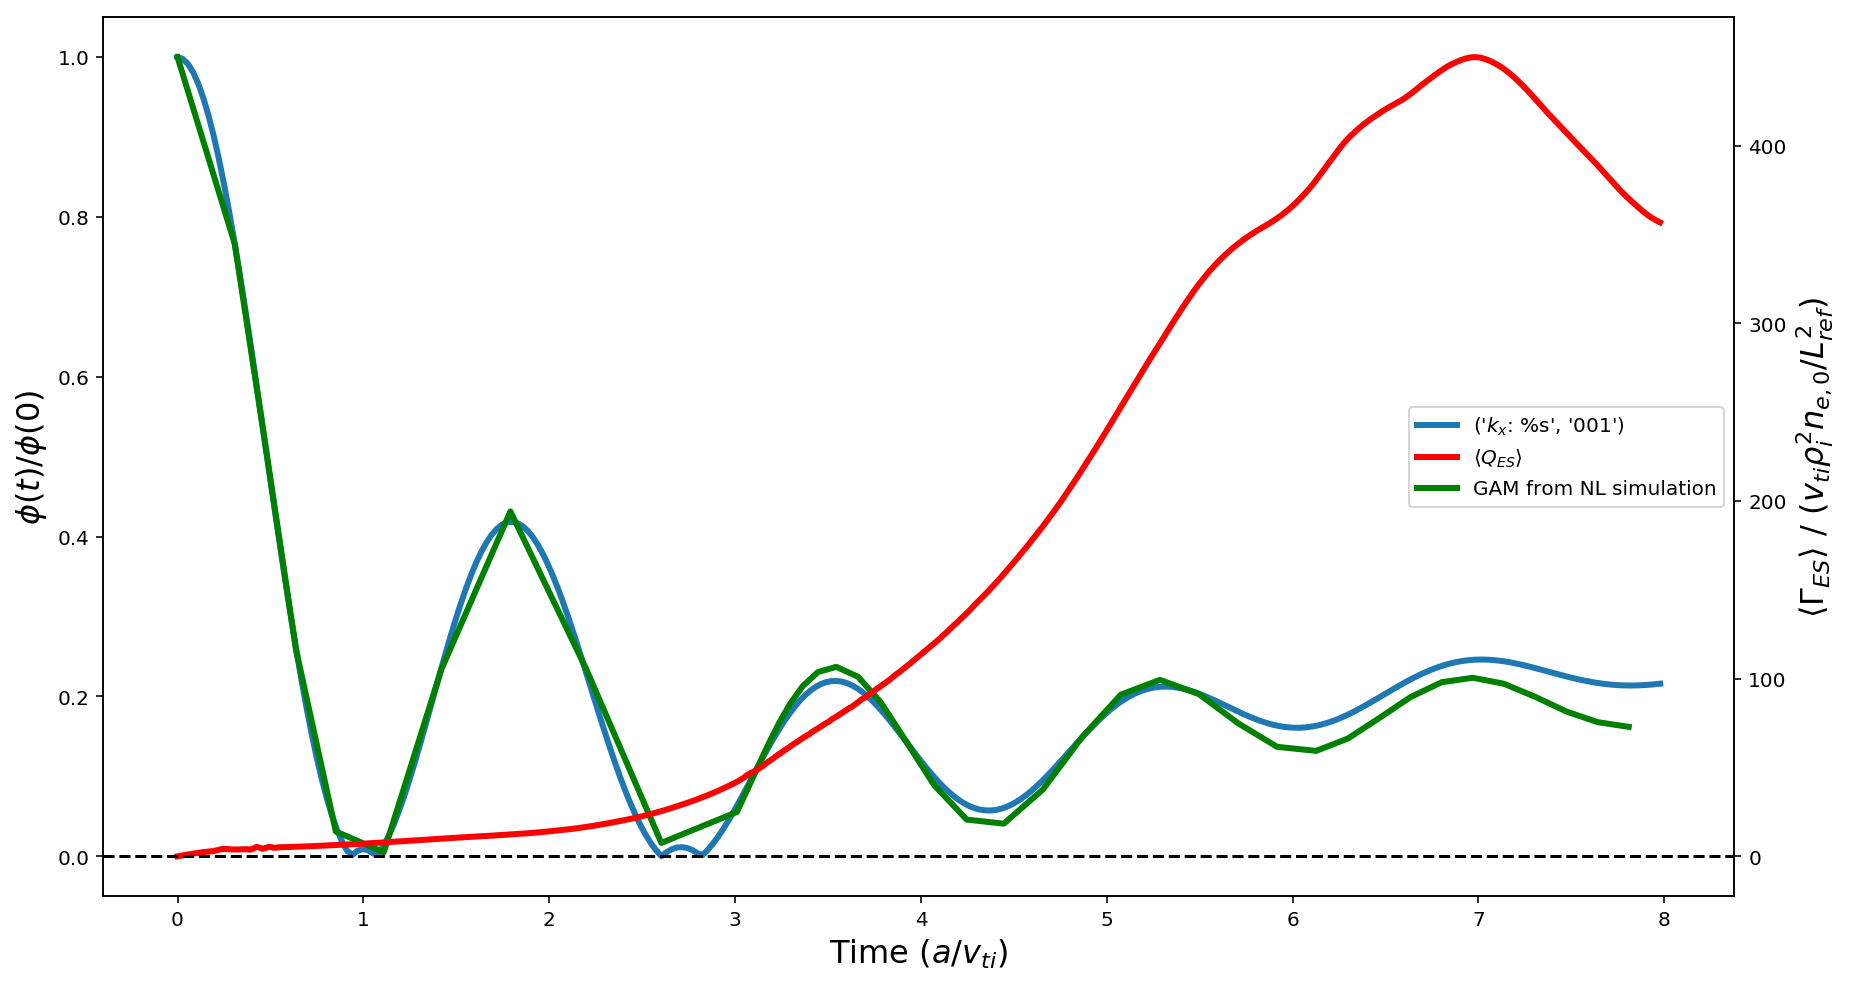

[[Model]]
    Model(line)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 16
    # data points      = 35
    # variables        = 2
    chi-square         = 0.32901514
    reduced chi-square = 0.00997016
    Akaike info crit   = -159.344985
    Bayesian info crit = -156.234289
[[Variables]]
    slope:     -1.88247778 +/- 0.02150334 (1.14%) (init = -1.96)
    intercept: -0.94874385 +/- 0.00358017 (0.38%) (init = -1.42)
[[Correlations]] (unreported correlations are < 0.250)
    C(slope, intercept) =  0.639



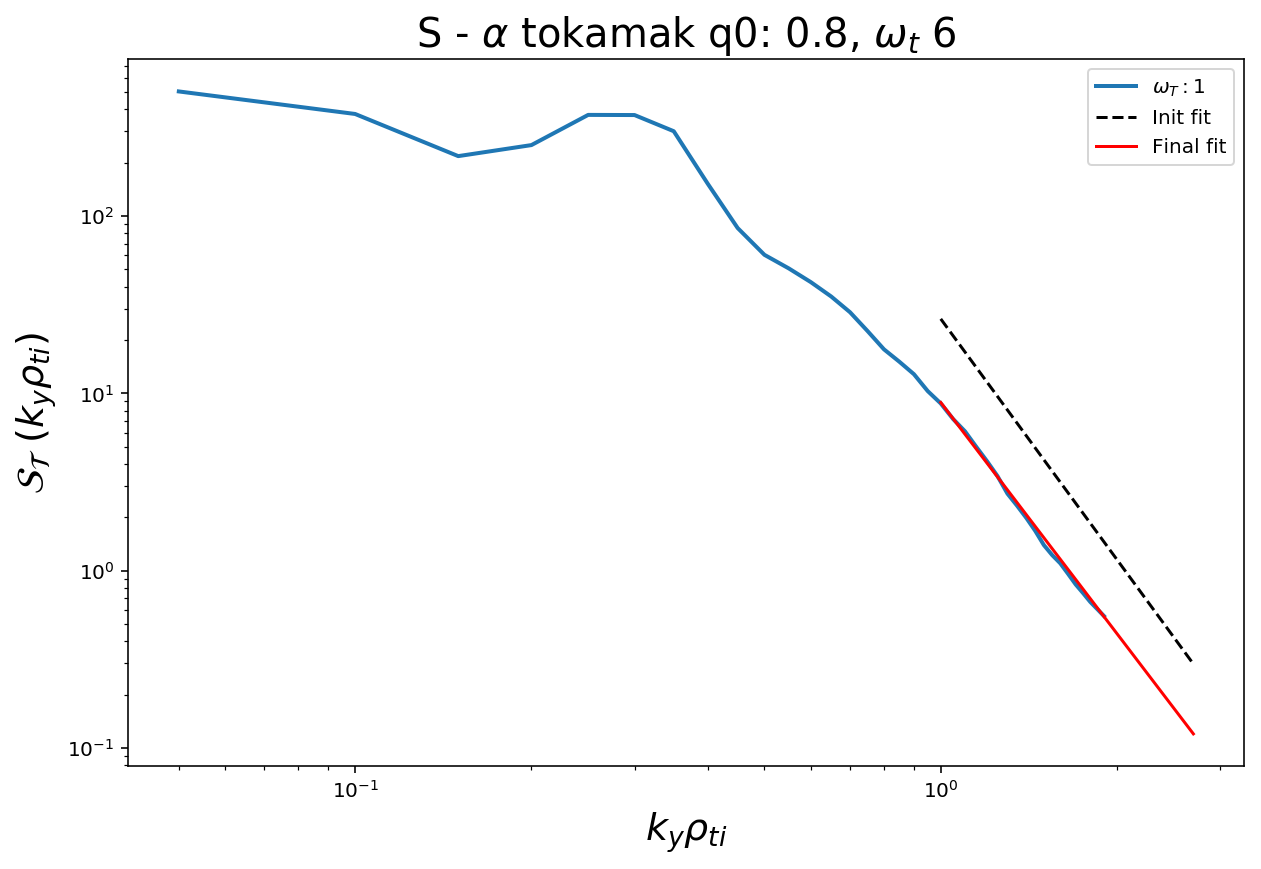

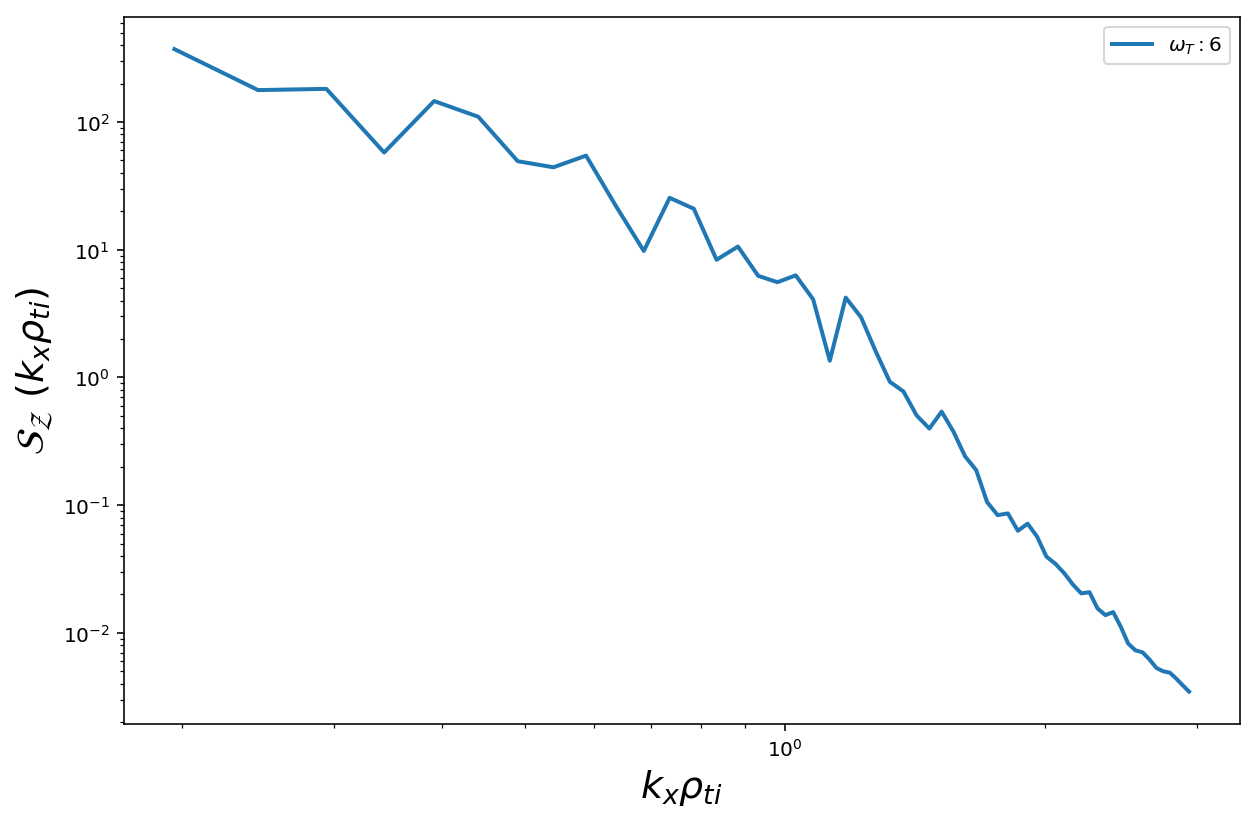

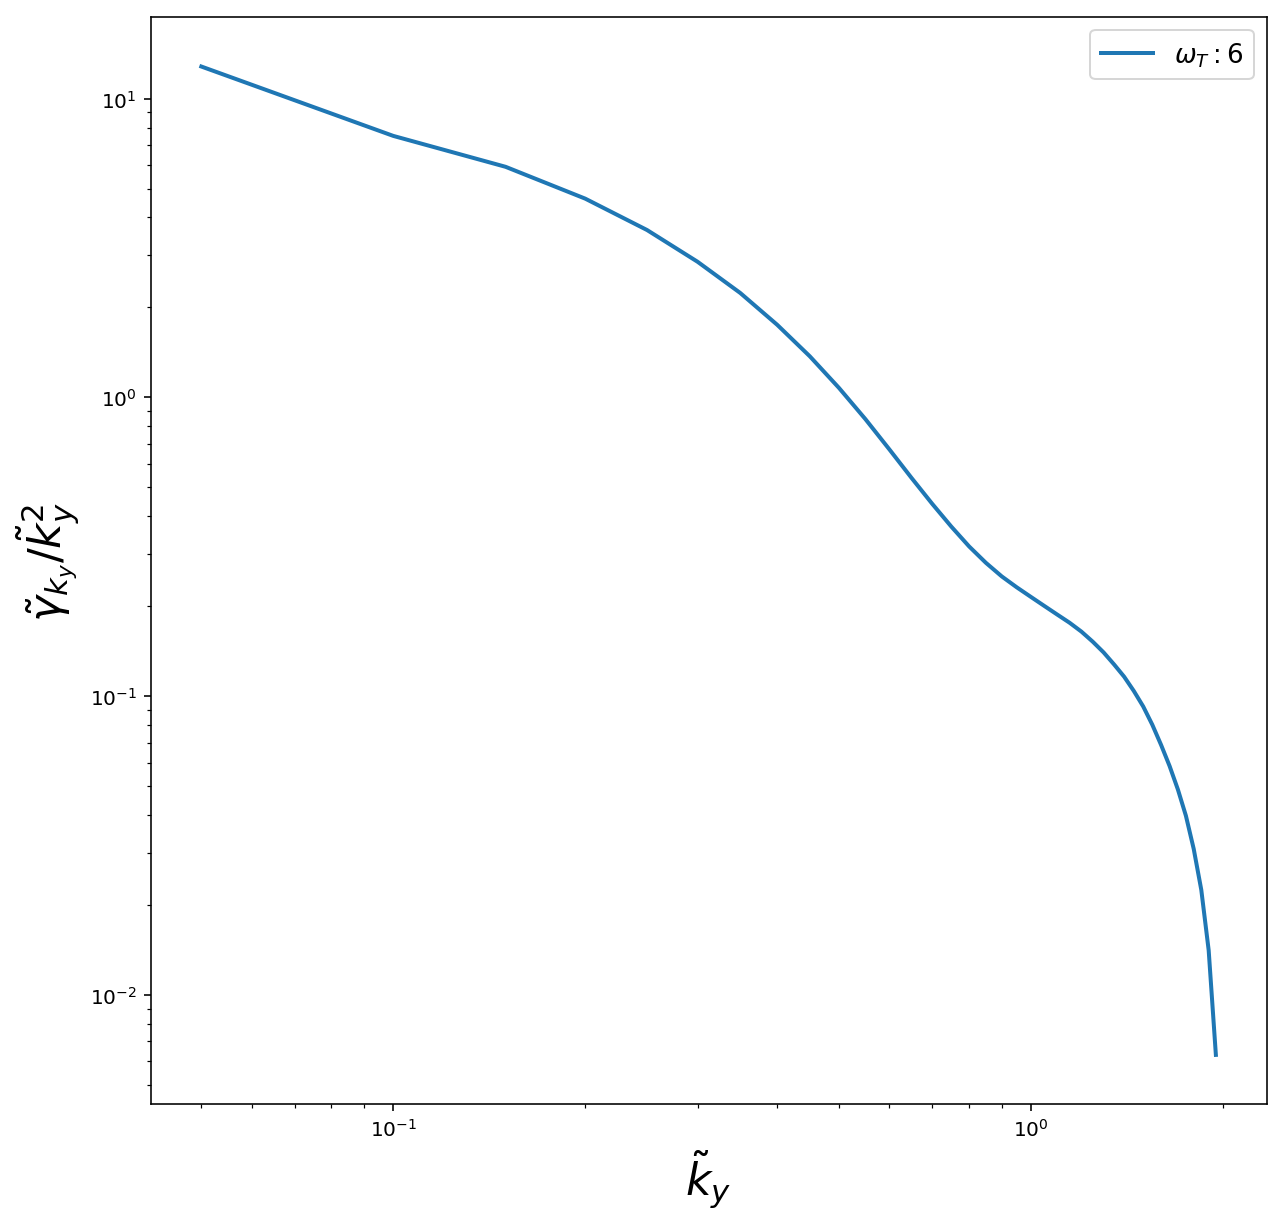

S-alpha geometry q0:0.8 omt:6
S_T slope   -1.882477780886825
T total:    136.3983475925
Z total:    55.88048488405102
Sum g/k^2:  49.739000128468426
Tau:        [1.721878435782723]


In [35]:
#111111111111111111111111111111111111111#
#1 STee maker & file loader            1#
#1 for S-alpha geometry, q0=0.8, omt=6 1#
#111111111111111111111111111111111111111#

# Load data
sa = [( pylab.loadtxt('q0-0.8/ITGa_NL/omt6/diag_ing/spectraions_act.dat',usecols = (0, 1)))][0]

#### Simulation parameters
nkx0 = 384
nky0 = 64
Lx = 128.205
kx_minimum = 0.049
ky_minimum = 0.05
t_final = 126.87048
t_sat = 8.46

Ts_sa08omt6 = 350         # Simulation temperature
TN_sa08omt6 = 2160        # Model reference temperature
rhos_sa08omt6 = 0.0027    # Simulation gyroradius
rhoN_sa08omt6 = 0.0018    # Model reference gyroradius

#### Geomertic parameters (Not very relevant)
q0       =    0.8
shat     =   0.78
trpeps   =   0.10
major_R  =    4.0

top = np.int(nkx0/2)

######################## Containers:
ky_sa08omt6 = np.zeros((top, nky0))
phisa = np.zeros((top, nky0))
St_sa08omt6 = np.zeros((nky0))
########################

# Extract ky and Phi for each omt
for n in range(0, top):
    lo = (0+(nky0*n))
    hi = (nky0+(nky0*n))
    ky_sa08omt6[n] = sa[lo:hi, 0]
    phisa[n] = sa[lo:hi, 1]
    np.add(St_sa08omt6, phisa[n]/ky_minimum, out=St_sa08omt6, where=True)

kx_salpha08, tzf_sa08omt6, E, t, f_s, label, tzf_sa08omt6_nl = diag('q0-0.8', maxlim=1, plot=True, Lx=Lx, nkx0=nkx0, omt=6, mxtime=8)
hi = (nky0+(nky0*(top-1)))
kx_sa08omt6 = sa[hi:(hi+top), 0]
Sz_sa08omt6 = sa[hi:(hi+top), 1]/kx_minimum

idx = (np.abs(kx_sa08omt6 - 0.2)).argmin()  # Implies that the minimum kx to compare comes from NL
x_cut = (np.abs(kx_sa08omt6 - 3.0)).argmin()
kx_sa08omt6 = kx_sa08omt6[idx:x_cut]
Sz_sa08omt6 = Sz_sa08omt6[idx:x_cut]

#tzf_sa08omt6 = my_data_salpha08[0, :]
#OSrat = my_data_salpha08[3, :]
#tzf_sa08omt6 = tzf_sa08omt6[min(range(len(kx_salpha08)), key=lambda i: abs(kx_salpha08[i]-0.1))]

idx2 = (np.abs(ky_sa08omt6 - 1.0)).argmin()
idx2f = idx2+35
Y = St_sa08omt6[idx2:idx2f]
X = ky_sa08omt6[1, idx2:idx2f]
pars = mod.make_params(intercept=-1.42, slope=-1.96)
out = mod.fit(Y, pars, x=X, nan_policy='propagate')
print(out.fit_report(min_correl=0.25))

ky_cut = (np.abs(ky_sa08omt6[1, 1:] - 2.0)).argmin()
ky_sa08omt6 = ky_sa08omt6[1, 1:ky_cut]
St_sa08omt6 = St_sa08omt6[1:ky_cut]

plt.figure(figsize=(10, 6.5))
plt.title("S - $\\alpha$ tokamak q0: 0.8, $\omega _{t}$ 6", fontsize=20)
plt.plot(ky_sa08omt6, St_sa08omt6, linewidth=2)  # Printing: the truncated range with normalisation
plt.plot(X, out.init_fit, 'k--')
plt.plot(X, out.best_fit, 'r-')
plt.legend(['$\omega_{T}: 1$', 'Init fit', 'Final fit'], fontsize=10)
plt.xscale('log')
plt.yscale('log')
pylab.xlabel('$k_{y}  \\rho_{ti}$',fontsize=19)
pylab.ylabel('$\mathcal{S}_{\mathcal{T}} \ (k_{y} \\rho_{ti})$',fontsize=19)
#plt.savefig('salpha08_st_plot.eps', format='eps', dpi=1200)
plt.show()

plt.figure(figsize=(10, 6.5))
plt.plot(kx_sa08omt6, Sz_sa08omt6, linewidth=2)
plt.xscale('log')
plt.yscale('log')
pylab.xlabel('$k_{x}  \\rho_{ti}$',fontsize=19)
pylab.ylabel('$\mathcal{S}_{\mathcal{Z}} \ (k_{x} \\rho_{ti})$',fontsize=19)
plt.legend(['$\omega_{T}: 6$', '$\\tau_{ZF}$', 'Overshoot Ratio'], fontsize=10)
#plt.savefig('salpha08_sz_plot.eps', format='eps', dpi=1200)
plt.show()

####### Load Linear simulations growth rates #######
dataset1 = [('./q0-0.8/ITGa_l/omt6.dat')]
datalist_1 = [ ( pylab.loadtxt(datapath,usecols = (0, 2, 4, 5))) for datapath in dataset1]
datalist_1 = datalist_1[0]
ky_min1 = datalist_1[:, 1]
gamma1 = datalist_1[:, 2]
omega1 = datalist_1[:, 3]

k1 = ky_min1[:ky_cut]
g1 = gamma1[:ky_cut]

plt.figure(figsize=(10, 10))
plt.plot(k1, g1/(k1**2), linewidth=2)
plt.xscale('log')
plt.yscale('log')
plt.legend(['$\omega_{T}: 6$'], fontsize=13)
plt.xlabel('$\\tilde{k}_{y}$',fontsize=22)
plt.ylabel('$\\tilde{\gamma}_{k_{y}} / \\tilde{k}^{2}_{y}$',fontsize=22)
plt.show()

appT_salpha08omt6 = np.nansum(g1/(k1**2))
te_salpha08omt6 = trapz(St_sa08omt6, x=ky_sa08omt6)
zet_salpha08omt6 = trapz(Sz_sa08omt6, x=kx_sa08omt6)
slope_salpha08omt6, intercept = out.best_values.values()

print('S-alpha geometry q0:0.8 omt:6')
print('S_T slope  ', slope_salpha08omt6)
print('T total:   ', te_salpha08omt6)
print('Z total:   ', zet_salpha08omt6)
print('Sum g/k^2: ', appT_salpha08omt6)
print('Tau:       ', tzf_sa08omt6)

#111111111111111111111111111111111111111#
#1 STee maker & file loader            1#
#1 for S-alpha geometry, q0=0.8, omt=6 1#
#111111111111111111111111111111111111111#

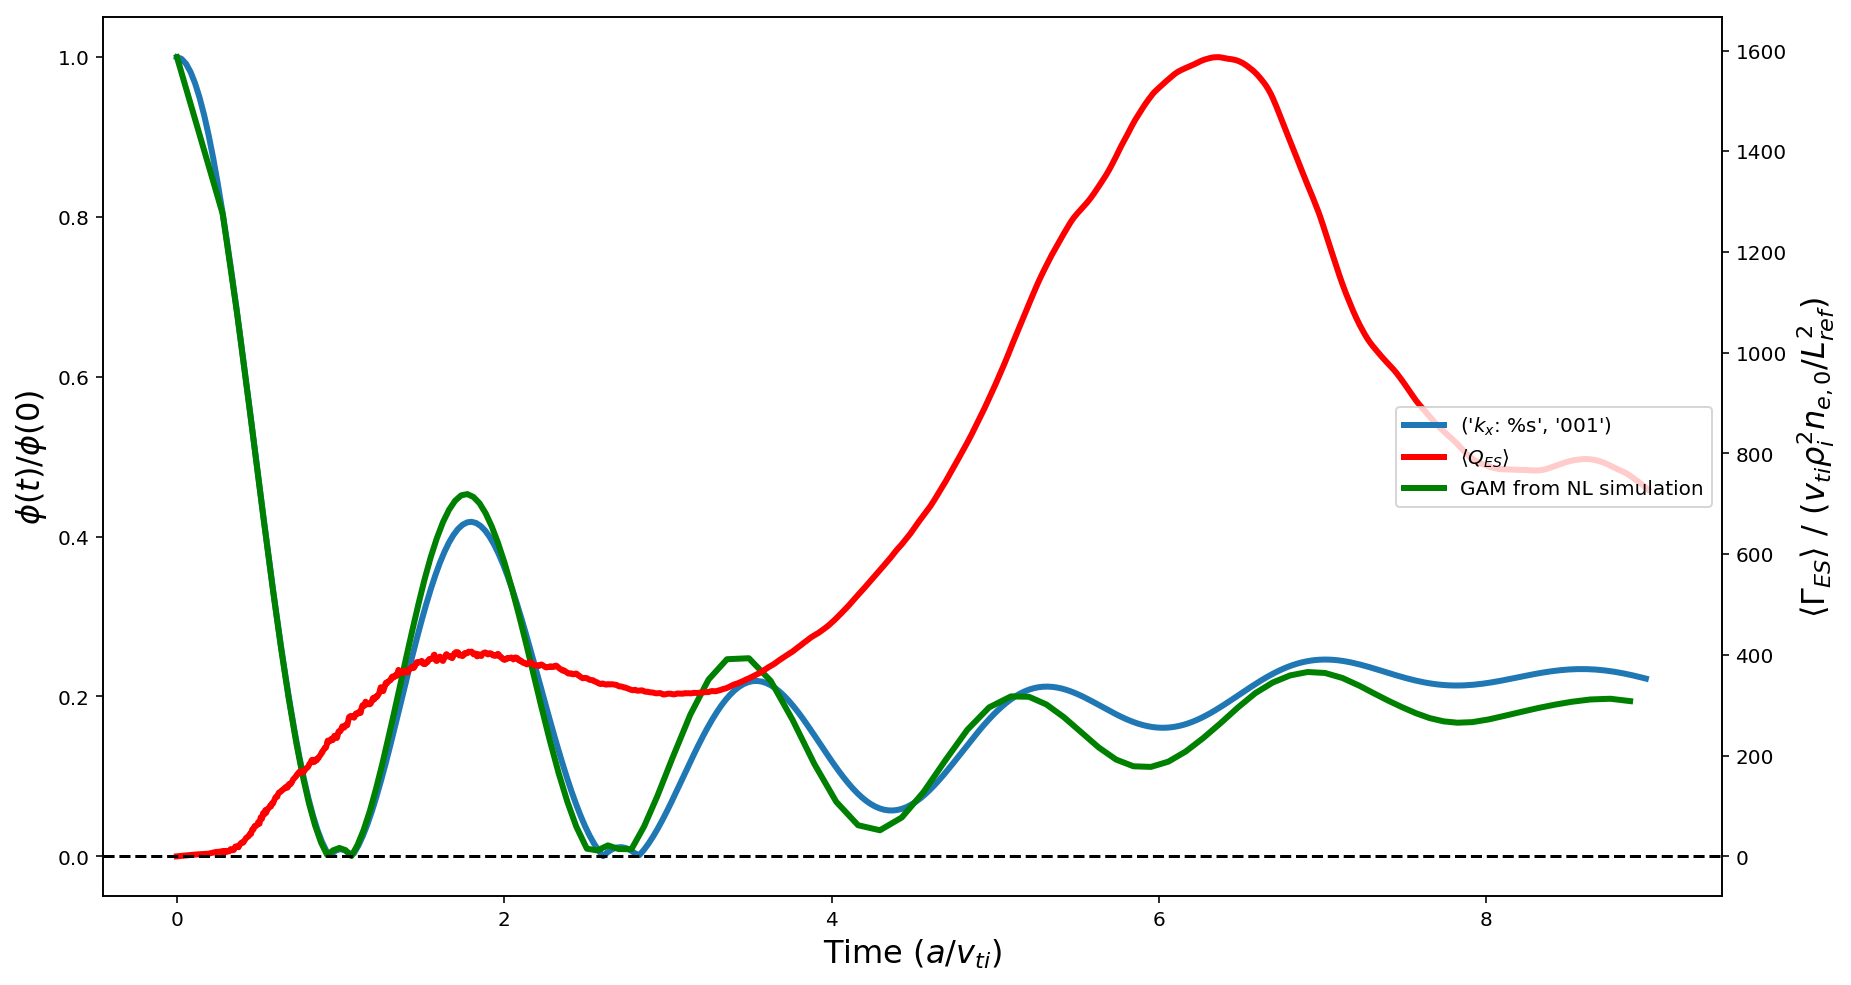

[[Model]]
    Model(line)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 23
    # data points      = 35
    # variables        = 2
    chi-square         = 162.633984
    reduced chi-square = 4.92830256
    Akaike info crit   = 57.7653942
    Bayesian info crit = 60.8760903
[[Variables]]
    slope:     -1.11992675 +/- 0.04309009 (3.85%) (init = -1.96)
    intercept: -1.67522722 +/- 0.01242682 (0.74%) (init = -1.42)
[[Correlations]] (unreported correlations are < 0.250)
    C(slope, intercept) =  0.699



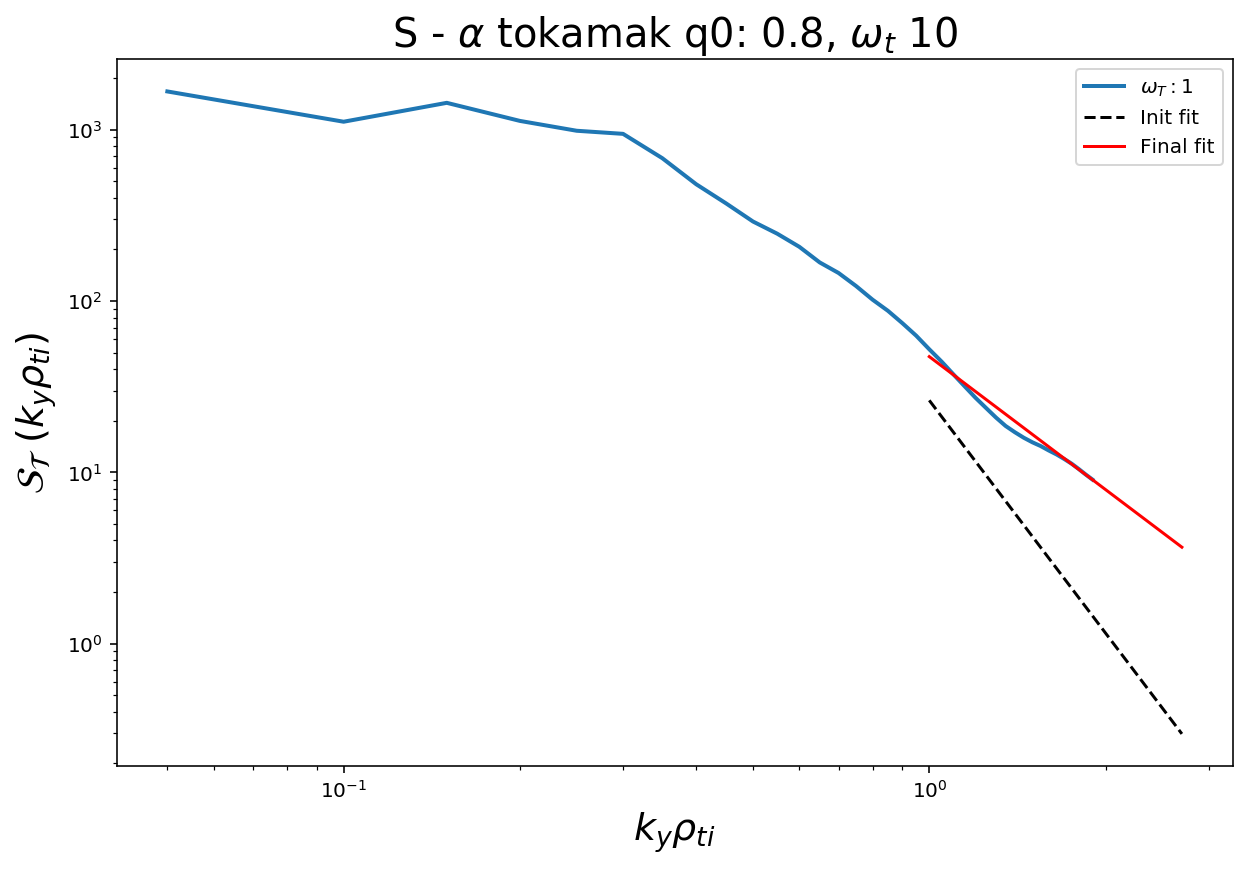

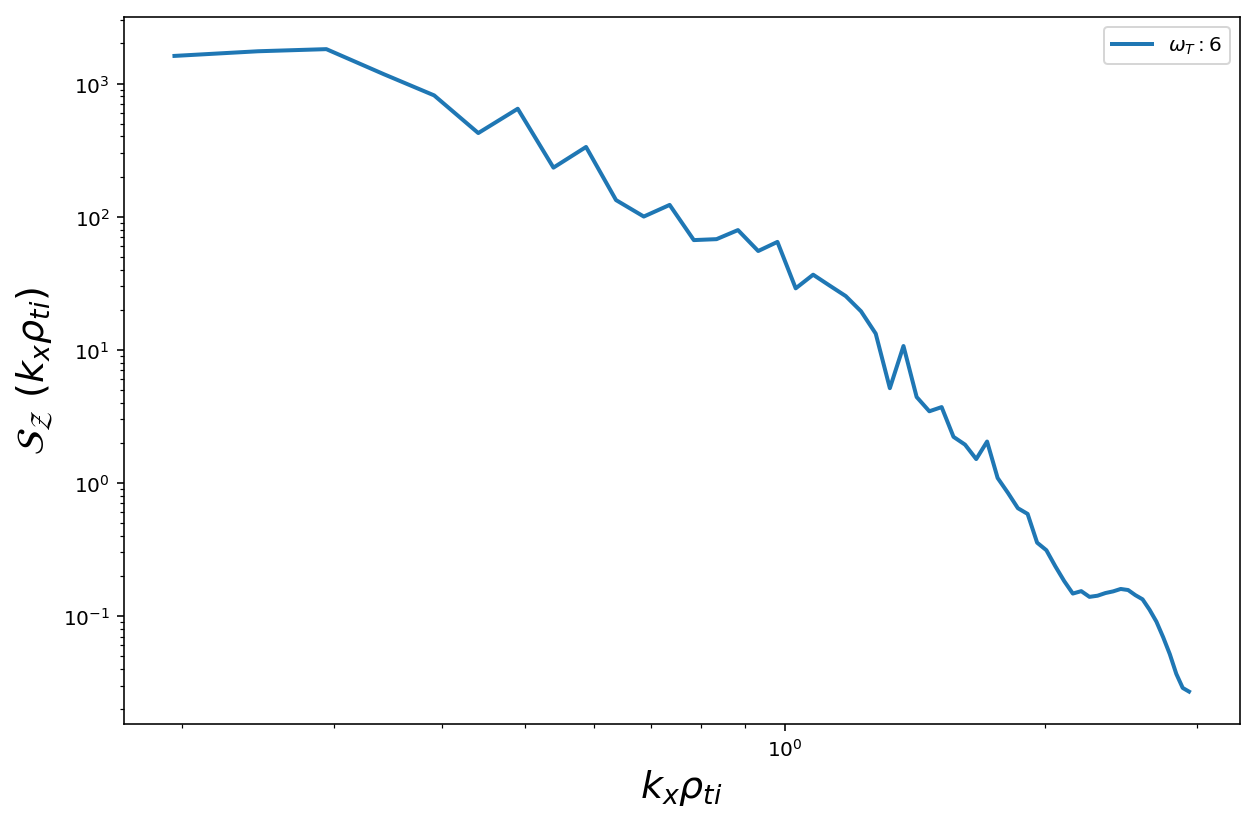

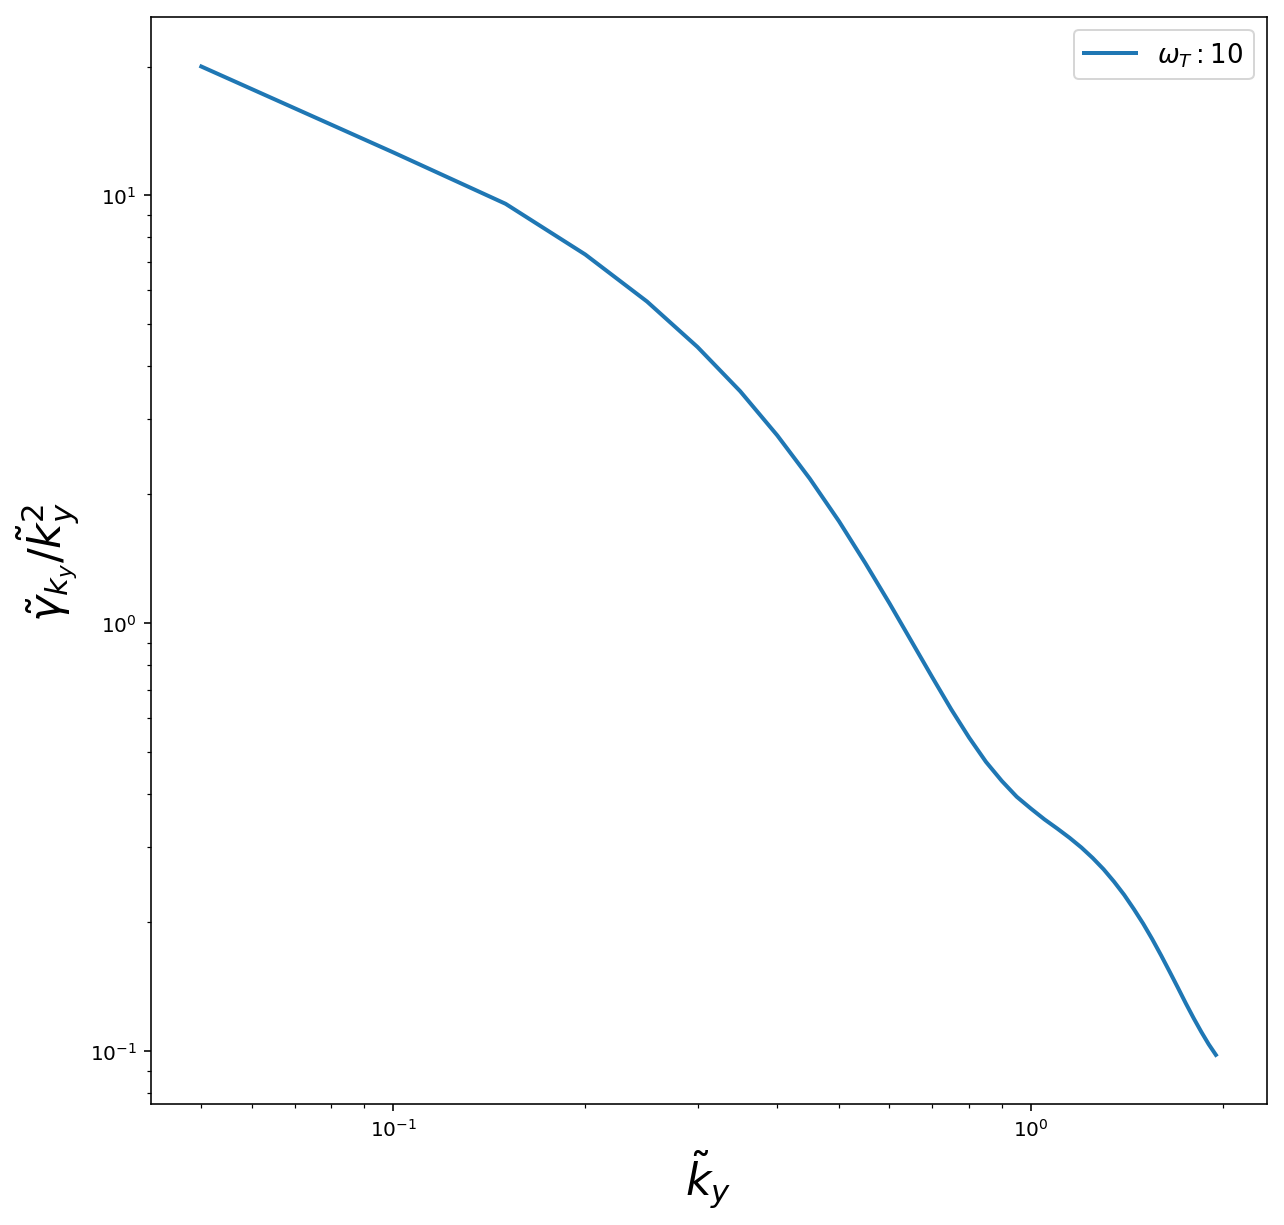

S-alpha geometry q0:0.8 omt:10
S_T slope   -1.1199267529611021
T total:    493.3870933799999
Z total:    434.7854858961224
Sum g/k^2:  80.5777072945397
Tau:        [1.949285185501438]


In [40]:
#2222222222222222222222222222222222222222#
#2 STee maker & file loader             2#
#2 for S-alpha geometry, q0=0.8, omt=10 2#
#2222222222222222222222222222222222222222#

# Load data
sa = [( pylab.loadtxt('q0-0.8/ITGa_NL/omt10/diag_ing/spectraions_act.dat',usecols = (0, 1)))][0]

#### Simulation parameters
nkx0 = 384
nky0 = 64
Lx = 128.205
kx_minimum = 0.049
ky_minimum = 0.05
t_final = 57.845631
t_sat = 9.5

Ts_sa08omt10 = 350         # Simulation temperature
TN_sa08omt10 = 2160        # Model reference temperature
rhos_sa08omt10 = 0.0027    # Simulation gyroradius
rhoN_sa08omt10 = 0.0018    # Model reference gyroradius

#### Geomertic parameters (Not very relevant)
q0       =    0.8
shat     =   0.78
trpeps   =   0.10
major_R  =    4.0

top = np.int(nkx0/2)

######################## Containers:
ky_sa08omt10 = np.zeros((top, nky0))
phisa = np.zeros((top, nky0))
St_sa08omt10 = np.zeros((nky0))
########################

# Extract ky and Phi for each omt
for n in range(0, top):
    lo = (0+(nky0*n))
    hi = (nky0+(nky0*n))
    ky_sa08omt10[n] = sa[lo:hi, 0]
    phisa[n] = sa[lo:hi, 1]
    np.add(St_sa08omt10, phisa[n]/ky_minimum, out=St_sa08omt10, where=True)

kx_salpha08, tzf_sa08omt10, E, t, f_s, label, tzf_sa08omt10_nl = diag('q0-0.8', maxlim=1, plot=True, Lx=Lx, nkx0=nkx0, omt=10, mxtime=9)
hi = (nky0+(nky0*(top-1)))
kx_sa08omt10 = sa[hi:(hi+top), 0]
Sz_sa08omt10 = sa[hi:(hi+top), 1]/kx_minimum

idx = (np.abs(kx_sa08omt10 - 0.2)).argmin()  # Implies that the minimum kx to compare comes from NL
x_cut = (np.abs(kx_sa08omt10 - 3.0)).argmin()
kx_sa08omt10 = kx_sa08omt10[idx:x_cut]
Sz_sa08omt10 = Sz_sa08omt10[idx:x_cut]

#OSrat = my_data_salpha08[3, :]
#tzf_sa08omt10 = tzf_sa08omt10[min(range(len(kx_salpha08)), key=lambda i: abs(kx_salpha08[i]-0.1))]

idx2 = (np.abs(ky_sa08omt10 - 1.0)).argmin()
idx2f = idx2+35
Y = St_sa08omt10[idx2:idx2f]
X = ky_sa08omt10[1, idx2:idx2f]
pars = mod.make_params(intercept=-1.42, slope=-1.96)
out = mod.fit(Y, pars, x=X, nan_policy='propagate')
print(out.fit_report(min_correl=0.25))

ky_cut = (np.abs(ky_sa08omt10[1, 1:] - 2.0)).argmin()
ky_sa08omt10 = ky_sa08omt10[1, 1:ky_cut]
St_sa08omt10 = St_sa08omt10[1:ky_cut]

plt.figure(figsize=(10, 6.5))
plt.title("S - $\\alpha$ tokamak q0: 0.8, $\omega _{t}$ 10", fontsize=20)
plt.plot(ky_sa08omt10, St_sa08omt10, linewidth=2)  # Printing: the truncated range with normalisation
plt.plot(X, out.init_fit, 'k--')
plt.plot(X, out.best_fit, 'r-')
plt.legend(['$\omega_{T}: 1$', 'Init fit', 'Final fit'], fontsize=10)
plt.xscale('log')
plt.yscale('log')
pylab.xlabel('$k_{y}  \\rho_{ti}$',fontsize=19)
pylab.ylabel('$\mathcal{S}_{\mathcal{T}} \ (k_{y} \\rho_{ti})$',fontsize=19)
#plt.savefig('salpha08_st_plot.eps', format='eps', dpi=1200)
plt.show()

plt.figure(figsize=(10, 6.5))
plt.plot(kx_sa08omt10, Sz_sa08omt10, linewidth=2)
plt.xscale('log')
plt.yscale('log')
pylab.xlabel('$k_{x}  \\rho_{ti}$',fontsize=19)
pylab.ylabel('$\mathcal{S}_{\mathcal{Z}} \ (k_{x} \\rho_{ti})$',fontsize=19)
plt.legend(['$\omega_{T}: 6$', '$\\tau_{ZF}$', 'Overshoot Ratio'], fontsize=10)
#plt.savefig('salpha08_sz_plot.eps', format='eps', dpi=1200)
plt.show()

####### Load Linear simulations growth rates #######
dataset1 = [('./q0-0.8/ITGa_l/omt10.dat')]
datalist_1 = [ ( pylab.loadtxt(datapath,usecols = (0, 2, 4, 5))) for datapath in dataset1]
datalist_1 = datalist_1[0]
ky_min1 = datalist_1[:, 1]
gamma1 = datalist_1[:, 2]
omega1 = datalist_1[:, 3]

k1 = ky_min1[:ky_cut]
g1 = gamma1[:ky_cut]

plt.figure(figsize=(10, 10))
plt.plot(k1, g1/(k1**2), linewidth=2)
plt.xscale('log')
plt.yscale('log')
plt.legend(['$\omega_{T}: 10$'], fontsize=13)
plt.xlabel('$\\tilde{k}_{y}$',fontsize=22)
plt.ylabel('$\\tilde{\gamma}_{k_{y}} / \\tilde{k}^{2}_{y}$',fontsize=22)
plt.show()

appT_salpha08omt10 = np.nansum(g1/(k1**2))
te_salpha08omt10 = trapz(St_sa08omt10, x=ky_sa08omt10)
zet_salpha08omt10 = trapz(Sz_sa08omt10, x=kx_sa08omt10) ########################### Check to be integrating over the same region everywhere
slope_salpha08omt10, intercept = out.best_values.values()

print('S-alpha geometry q0:0.8 omt:10')
print('S_T slope  ', slope_salpha08omt10)
print('T total:   ', te_salpha08omt10)
print('Z total:   ', zet_salpha08omt10)
print('Sum g/k^2: ', appT_salpha08omt10)
print('Tau:       ', tzf_sa08omt10)

#2222222222222222222222222222222222222222#
#2 STee maker & file loader             2#
#2 for S-alpha geometry, q0=0.8, omt=10 2#
#2222222222222222222222222222222222222222#

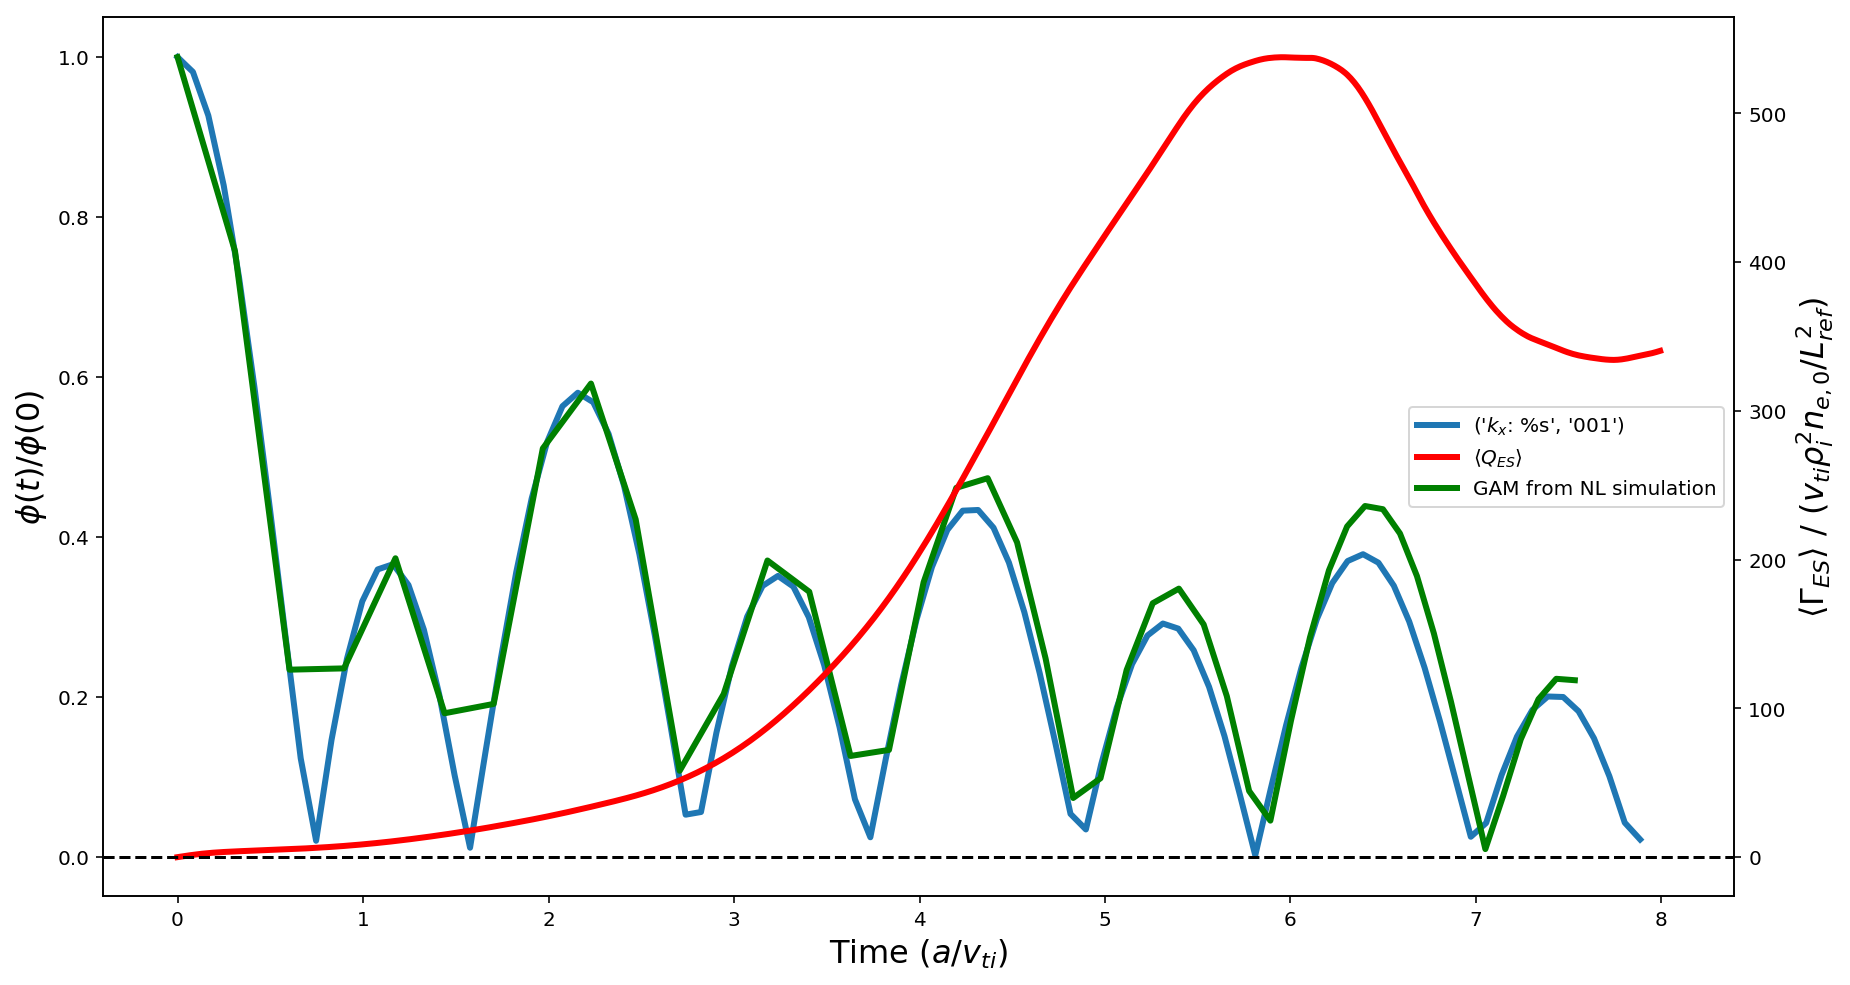

[[Model]]
    Model(line)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 16
    # data points      = 35
    # variables        = 2
    chi-square         = 0.53764619
    reduced chi-square = 0.01629231
    Akaike info crit   = -142.156592
    Bayesian info crit = -139.045896
[[Variables]]
    slope:     -1.99389547 +/- 0.03004150 (1.51%) (init = -1.96)
    intercept: -0.94835678 +/- 0.00467321 (0.49%) (init = -1.42)
[[Correlations]] (unreported correlations are < 0.250)
    C(slope, intercept) =  0.634



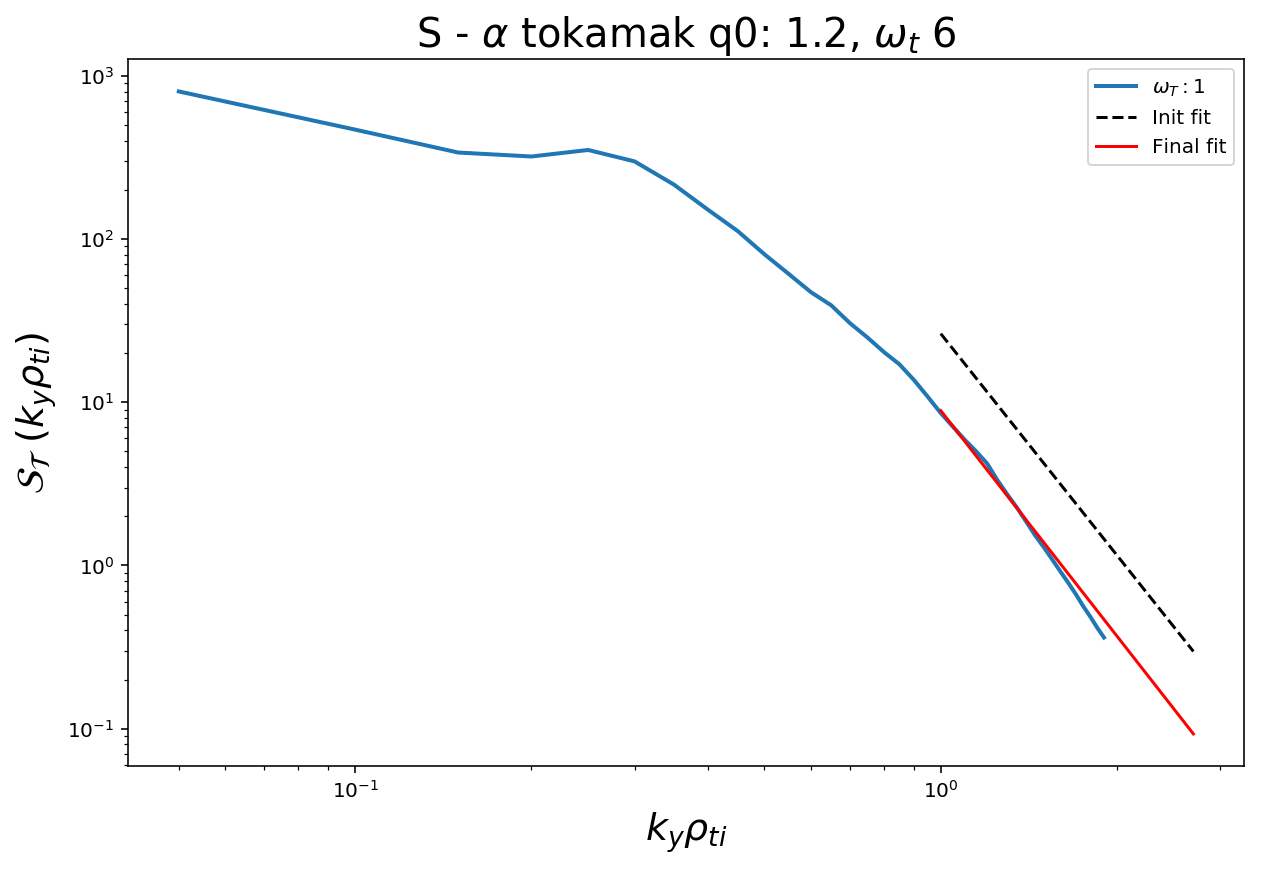

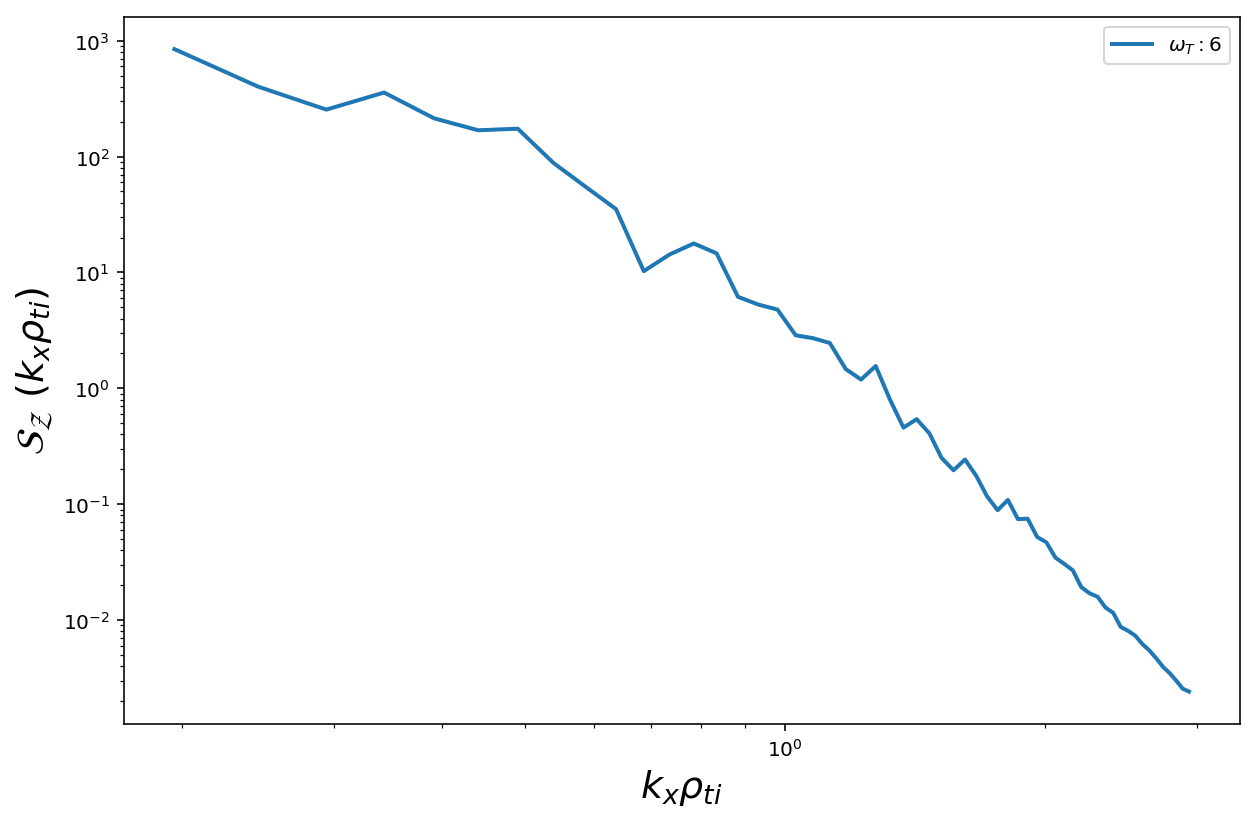

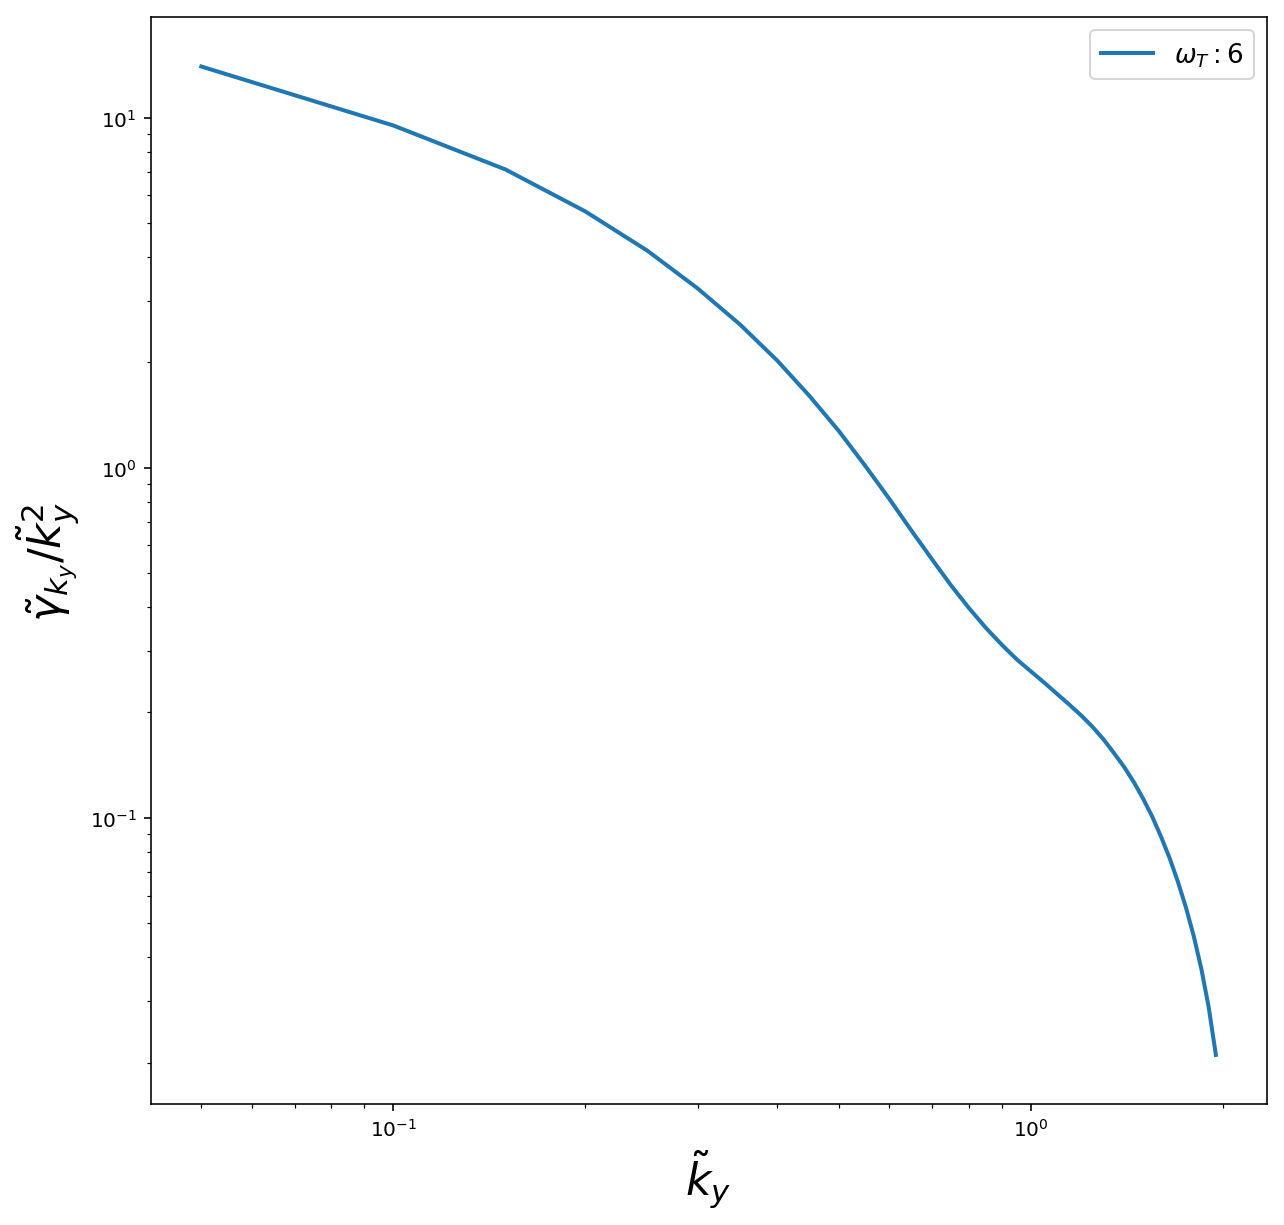

S-alpha geometry q0: 1.2 omt:6
S_T slope   -1.9938954683259342
T total:    152.4875817021
Z total:    110.66904305241837
Sum g/k^2:  58.276461997947976
Tzf:        [2.187722240855107]


In [33]:
#333333333333333333333333333333333333333#
#3 STee maker & file loader            3#
#3 for S-alpha geometry, q0=1.2, omt=6 3#
#333333333333333333333333333333333333333#

# Load data
sa = [( pylab.loadtxt('q0-1.2/ITGa_NL/omt6/diag_ing/spectraions_act.dat',usecols = (0, 1)))][0]

#### Simulation parameters
nkx0 = 384
nky0 = 64
Lx = 128.205
kx_minimum = 0.049
ky_minimum = 0.05
t_final = 87.063935
t_sat = 7.74

Ts_sa12omt6 = 350         # Simulation temperature
TN_sa12omt6 = 2160        # Model reference temperature
rhos_sa12omt6 = 0.0027    # Simulation gyroradius
rhoN_sa12omt6 = 0.0018    # Model reference gyroradius

#### Geomertic parameters (Not very relevant)
q0       =    1.2
shat     =   0.78
trpeps   =   0.10
major_R  =    4.0

top = np.int(nkx0/2)

######################## Containers:
ky_sa12omt6 = np.zeros((top, nky0))
phisa = np.zeros((top, nky0))
St_sa12omt6 = np.zeros((nky0))
########################

# Extract ky and Phi for each omt
for n in range(0, top):
    lo = (0+(nky0*n))
    hi = (nky0+(nky0*n))
    ky_sa12omt6[n] = sa[lo:hi, 0]
    phisa[n] = sa[lo:hi, 1]
    np.add(St_sa12omt6, phisa[n]/ky_minimum, out=St_sa12omt6, where=True)

kx_salpha12, tzf_sa12omt6, E, t, f_s, label, tzf_sa12omt6_nl = diag('q0-1.2', maxlim=1, plot=True, Lx=Lx, nkx0=nkx0, omt=6, mxtime=8)
hi = (nky0+(nky0*(top-1)))
kx_sa12omt6 = sa[hi:(hi+top), 0]
Sz_sa12omt6 = sa[hi:(hi+top), 1]/kx_minimum

idx = (np.abs(kx_sa12omt6 - 0.2)).argmin()  # Implies that the minimum kx to compare comes from NL
x_cut = (np.abs(kx_sa12omt6 - 3.0)).argmin()
kx_sa12omt6 = kx_sa12omt6[idx:x_cut]
Sz_sa12omt6 = Sz_sa12omt6[idx:x_cut]

#OSrat = my_data_salpha12[3, :]
#tzf_sa12omt6 = tzf_sa12omt6[min(range(len(kx_salpha12)), key=lambda i: abs(kx_salpha12[i]-0.1))]

idx2 = (np.abs(ky_sa12omt6 - 1.0)).argmin()
idx2f = idx2+35
Y = St_sa12omt6[idx2:idx2f]
X = ky_sa12omt6[1, idx2:idx2f]
pars = mod.make_params(intercept=-1.42, slope=-1.96)
out = mod.fit(Y, pars, x=X, nan_policy='propagate')
print(out.fit_report(min_correl=0.25))

ky_cut = (np.abs(ky_sa12omt6[1, 1:] - 2.0)).argmin()  
ky_sa12omt6 = ky_sa12omt6[1, 1:ky_cut]
St_sa12omt6 = St_sa12omt6[1:ky_cut]

plt.figure(figsize=(10, 6.5))
plt.title("S - $\\alpha$ tokamak q0: 1.2, $\omega _{t}$ 6", fontsize=20)
plt.plot(ky_sa12omt6, St_sa12omt6, linewidth=2)  # Printing: the truncated range with normalisation
plt.plot(X, out.init_fit, 'k--')
plt.plot(X, out.best_fit, 'r-')
plt.legend(['$\omega_{T}: 1$', 'Init fit', 'Final fit'], fontsize=10)
plt.xscale('log')
plt.yscale('log')
pylab.xlabel('$k_{y}  \\rho_{ti}$',fontsize=19)
pylab.ylabel('$\mathcal{S}_{\mathcal{T}} \ (k_{y} \\rho_{ti})$',fontsize=19)
#plt.savefig('salpha12_st_plot.eps', format='eps', dpi=1200)
plt.show()

plt.figure(figsize=(10, 6.5))
plt.plot(kx_sa12omt6, Sz_sa12omt6, linewidth=2)
plt.xscale('log')
plt.yscale('log')
pylab.xlabel('$k_{x}  \\rho_{ti}$',fontsize=19)
pylab.ylabel('$\mathcal{S}_{\mathcal{Z}} \ (k_{x} \\rho_{ti})$',fontsize=19)
plt.legend(['$\omega_{T}: 6$', '$\\tau_{ZF}$', 'Overshoot Ratio'], fontsize=10)
#plt.savefig('salpha12_sz_plot.eps', format='eps', dpi=1200)
plt.show()

####### Load Linear simulations growth rates #######
dataset1 = [('./q0-1.2/ITGa_l/omt6.dat')]
datalist_1 = [ ( pylab.loadtxt(datapath,usecols = (0, 2, 4, 5))) for datapath in dataset1]
datalist_1 = datalist_1[0]
ky_min1 = datalist_1[:, 1]
gamma1 = datalist_1[:, 2]
omega1 = datalist_1[:, 3]

k1 = ky_min1[:ky_cut]
g1 = gamma1[:ky_cut]

plt.figure(figsize=(10, 10))
plt.plot(k1, g1/(k1**2), linewidth=2)
plt.xscale('log')
plt.yscale('log')
plt.legend(['$\omega_{T}: 6$'], fontsize=13)
plt.xlabel('$\\tilde{k}_{y}$',fontsize=22)
plt.ylabel('$\\tilde{\gamma}_{k_{y}} / \\tilde{k}^{2}_{y}$',fontsize=22)
plt.show()

appT_salpha12omt6 = np.nansum(g1/(k1**2))
te_salpha12omt6 = trapz(St_sa12omt6, x=ky_sa12omt6)
zet_salpha12omt6 = trapz(Sz_sa12omt6, x=kx_sa12omt6)
slope_salpha12omt6, intercept = out.best_values.values()

print('S-alpha geometry q0: 1.2 omt:6')
print('S_T slope  ', slope_salpha12omt6)
print('T total:   ', te_salpha12omt6)
print('Z total:   ', zet_salpha12omt6)
print('Sum g/k^2: ', appT_salpha12omt6)
print('Tzf:       ', tzf_sa12omt6)

#333333333333333333333333333333333333333#
#3 STee maker & file loader            3#
#3 for S-alpha geometry, q0=1.2, omt=6 3#
#333333333333333333333333333333333333333#

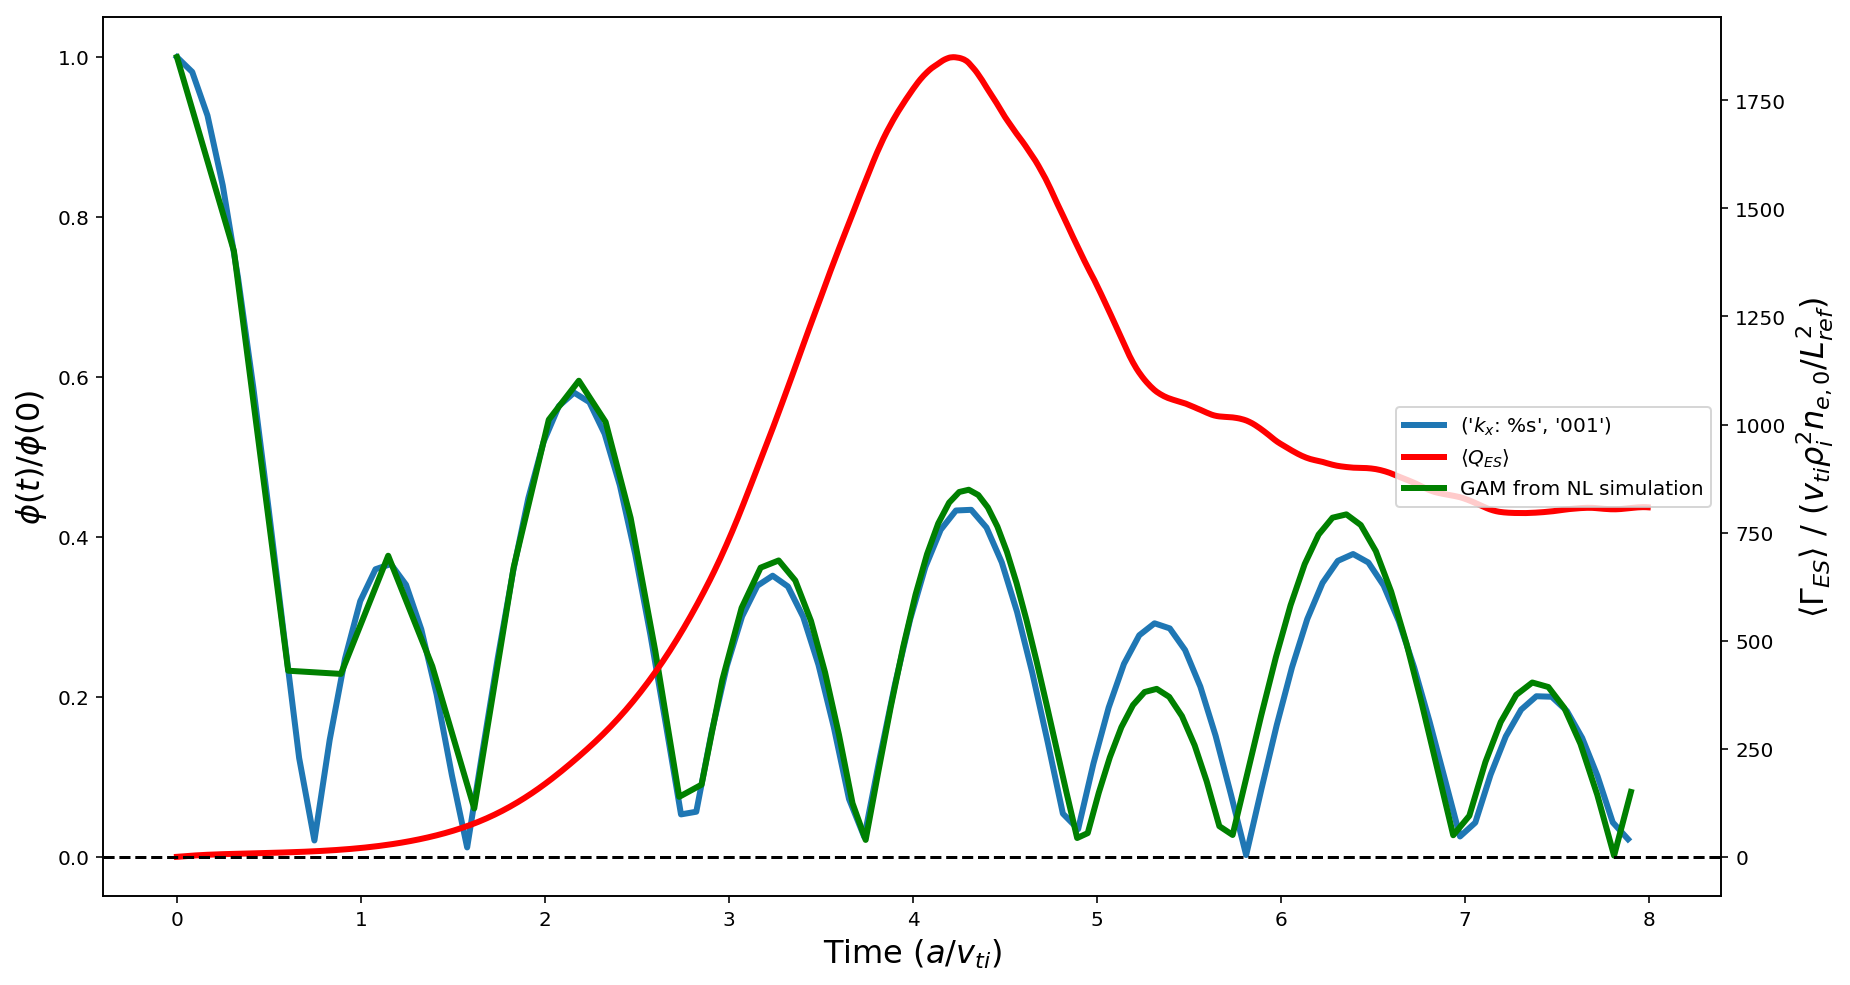

[[Model]]
    Model(line)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 16
    # data points      = 35
    # variables        = 2
    chi-square         = 4.07542946
    reduced chi-square = 0.12349786
    Akaike info crit   = -71.2630176
    Bayesian info crit = -68.1523215
[[Variables]]
    slope:     -1.91270860 +/- 0.01502305 (0.79%) (init = -1.96)
    intercept: -1.66152980 +/- 0.00245483 (0.15%) (init = -1.42)
[[Correlations]] (unreported correlations are < 0.250)
    C(slope, intercept) =  0.638



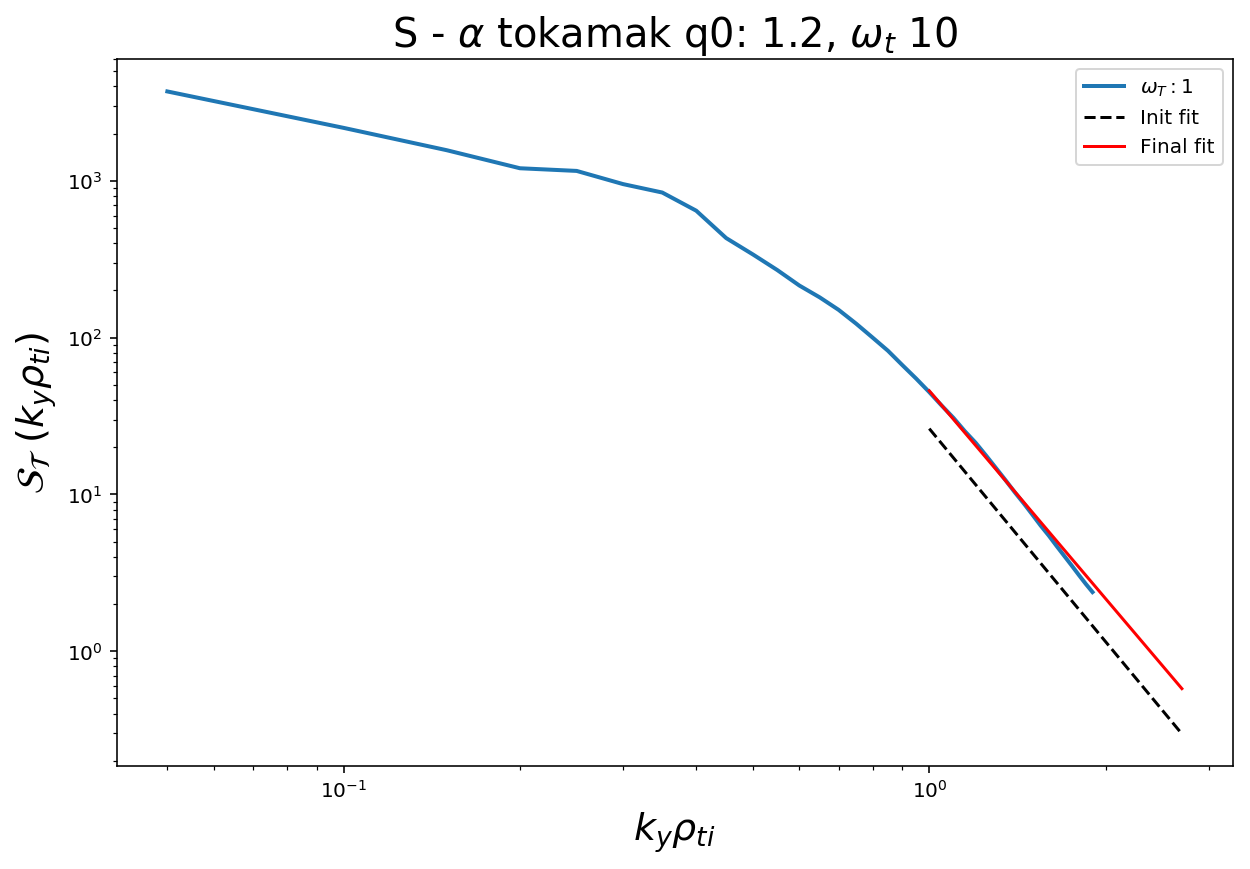

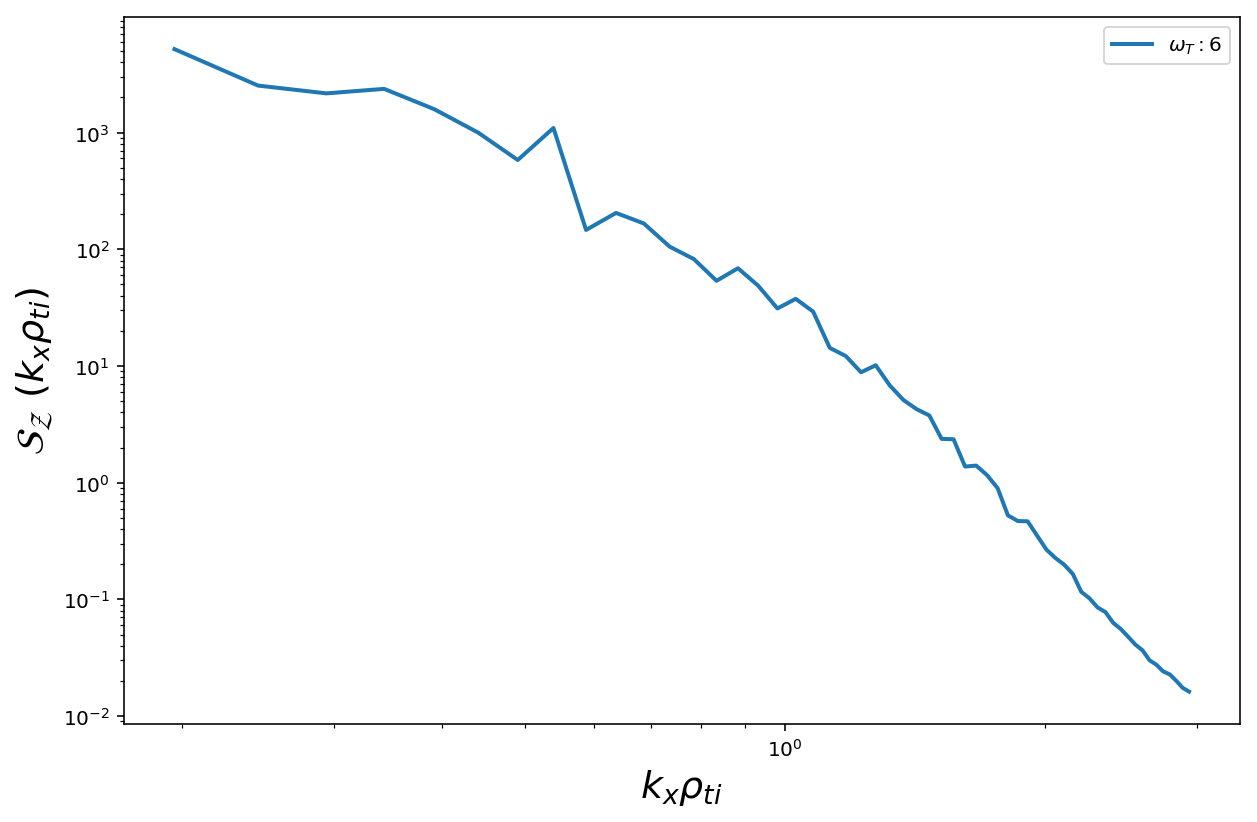

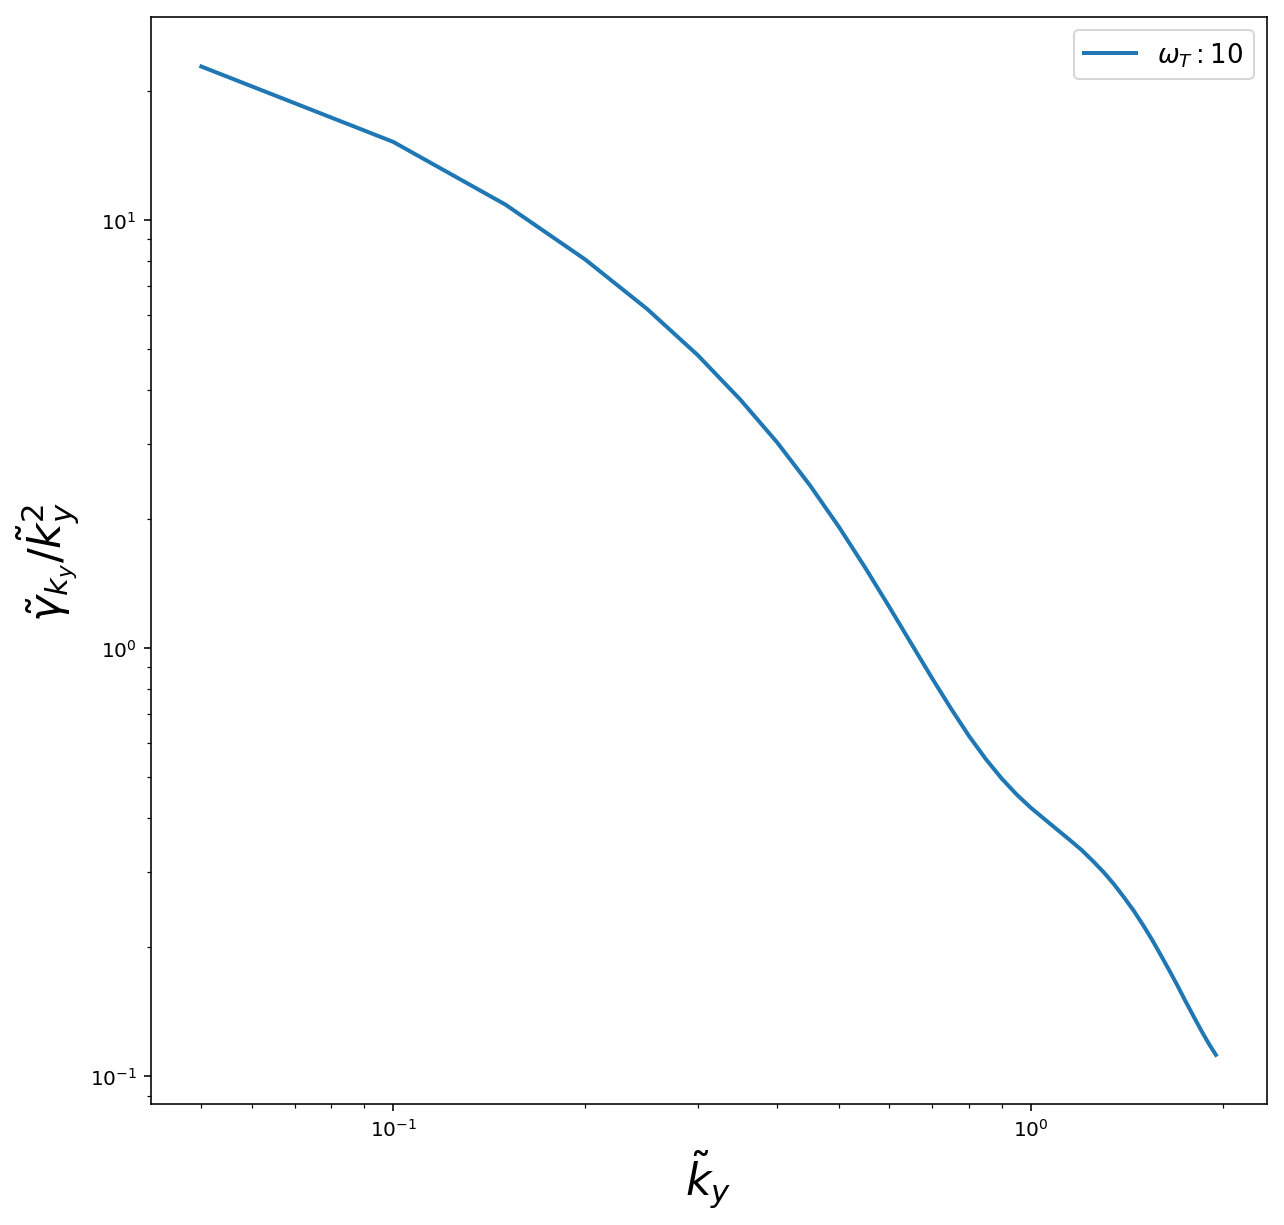

S-alpha geometry q0: 1.2 omt:10
S_T slope   -1.9127086018889639
T total:    634.4598691694998
Z total:    734.1060408847959
Sum g/k^2:  91.47492234743517
Tzf:        [2.187722240855107]


In [41]:
#4444444444444444444444444444444444444444#
#4 STee maker & file loader             4#
#4 for S-alpha geometry, q0=1.2, omt=10 4#
#4444444444444444444444444444444444444444#

# Load data
sa = [( pylab.loadtxt('q0-1.2/ITGa_NL/omt10/diag_ing/spectraions_act.dat',usecols = (0, 1)))][0]

#### Simulation parameters
nkx0 = 384
nky0 = 64
Lx = 128.205
kx_minimum = 0.049
ky_minimum = 0.05
t_final = 61.692025
t_sat = 10

Ts_sa12omt10 = 350         # Simulation temperature
TN_sa12omt10 = 2160        # Model reference temperature
rhos_sa12omt10 = 0.0027    # Simulation gyroradius
rhoN_sa12omt10 = 0.0018    # Model reference gyroradius

#### Geomertic parameters (Not very relevant)
q0       =    1.2
shat     =   0.78
trpeps   =   0.10
major_R  =    4.0

top = np.int(nkx0/2)

######################## Containers:
ky_sa12omt10 = np.zeros((top, nky0))
phisa = np.zeros((top, nky0))
St_sa12omt10 = np.zeros((nky0))
########################

# Extract ky and Phi for each omt
for n in range(0, top):
    lo = (0+(nky0*n))
    hi = (nky0+(nky0*n))
    ky_sa12omt10[n] = sa[lo:hi, 0]
    phisa[n] = sa[lo:hi, 1]
    np.add(St_sa12omt10, phisa[n]/ky_minimum, out=St_sa12omt10, where=True)

kx_salpha12, tzf_sa12omt10, E, t, f_s, label, tzf_sa12omt10_nl = diag('q0-1.2', maxlim=1, plot=True, Lx=Lx, nkx0=nkx0, omt=10, mxtime=8)
hi = (nky0+(nky0*(top-1)))
kx_sa12omt10 = sa[hi:(hi+top), 0]
Sz_sa12omt10 = sa[hi:(hi+top), 1]/kx_minimum

idx = (np.abs(kx_sa12omt10 - 0.2)).argmin()  # Implies that the minimum kx to compare comes from NL
x_cut = (np.abs(kx_sa12omt10 - 3.0)).argmin()
kx_sa12omt10 = kx_sa12omt10[idx:x_cut]                   #
Sz_sa12omt10 = Sz_sa12omt10[idx:x_cut]                   #

#OSrat = my_data_salpha12[3, :]
#tzf_sa12omt10 = tzf_sa12omt10[min(range(len(kx_salpha12)), key=lambda i: abs(kx_salpha12[i]-0.1))]

idx2 = (np.abs(ky_sa12omt10 - 1.0)).argmin()
idx2f = idx2+35
Y = St_sa12omt10[idx2:idx2f]
X = ky_sa12omt10[1, idx2:idx2f]
pars = mod.make_params(intercept=-1.42, slope=-1.96)
out = mod.fit(Y, pars, x=X, nan_policy='propagate')
print(out.fit_report(min_correl=0.25))

ky_cut = (np.abs(ky_sa12omt10[1, 1:] - 2.0)).argmin()
ky_sa12omt10 = ky_sa12omt10[1, 1:ky_cut]
St_sa12omt10 = St_sa12omt10[1:ky_cut]

plt.figure(figsize=(10, 6.5))
plt.title("S - $\\alpha$ tokamak q0: 1.2, $\omega _{t}$ 10", fontsize=20)
plt.plot(ky_sa12omt10, St_sa12omt10, linewidth=2)  # Printing: the truncated range with normalisation
plt.plot(X, out.init_fit, 'k--')
plt.plot(X, out.best_fit, 'r-')
plt.legend(['$\omega_{T}: 1$', 'Init fit', 'Final fit'], fontsize=10)
plt.xscale('log')
plt.yscale('log')
pylab.xlabel('$k_{y}  \\rho_{ti}$',fontsize=19)
pylab.ylabel('$\mathcal{S}_{\mathcal{T}} \ (k_{y} \\rho_{ti})$',fontsize=19)
#plt.savefig('salpha12_st_plot.eps', format='eps', dpi=1200)
plt.show()

plt.figure(figsize=(10, 6.5))
plt.plot(kx_sa12omt10, Sz_sa12omt10, linewidth=2)
plt.xscale('log')
plt.yscale('log')
pylab.xlabel('$k_{x}  \\rho_{ti}$',fontsize=19)
pylab.ylabel('$\mathcal{S}_{\mathcal{Z}} \ (k_{x} \\rho_{ti})$',fontsize=19)
plt.legend(['$\omega_{T}: 6$', '$\\tau_{ZF}$', 'Overshoot Ratio'], fontsize=10)
#plt.savefig('salpha12_sz_plot.eps', format='eps', dpi=1200)
plt.show()

####### Load Linear simulations growth rates #######
dataset1 = [('./q0-1.2/ITGa_l/omt10.dat')]
datalist_1 = [ ( pylab.loadtxt(datapath,usecols = (0, 2, 4, 5))) for datapath in dataset1]
datalist_1 = datalist_1[0]
ky_min1 = datalist_1[:, 1]
gamma1 = datalist_1[:, 2]
omega1 = datalist_1[:, 3]

k1 = ky_min1[:ky_cut]
g1 = gamma1[:ky_cut]

plt.figure(figsize=(10, 10))
plt.plot(k1, g1/(k1**2), linewidth=2)
plt.xscale('log')
plt.yscale('log')
plt.legend(['$\omega_{T}: 10$'], fontsize=13)
plt.xlabel('$\\tilde{k}_{y}$',fontsize=22)
plt.ylabel('$\\tilde{\gamma}_{k_{y}} / \\tilde{k}^{2}_{y}$',fontsize=22)
plt.show()

appT_salpha12omt10 = np.nansum(g1/(k1**2))
te_salpha12omt10 = trapz(St_sa12omt10, x=ky_sa12omt10)
zet_salpha12omt10 = trapz(Sz_sa12omt10, x=kx_sa12omt10)
slope_salpha12omt10, intercept = out.best_values.values()

print('S-alpha geometry q0: 1.2 omt:10')
print('S_T slope  ', slope_salpha12omt10)
print('T total:   ', te_salpha12omt10)
print('Z total:   ', zet_salpha12omt10)
print('Sum g/k^2: ', appT_salpha12omt10)
print('Tzf:       ', tzf_sa12omt10)

#4444444444444444444444444444444444444444#
#4 STee maker & file loader             4#
#4 for S-alpha geometry, q0=1.2, omt=10 4#
#4444444444444444444444444444444444444444#

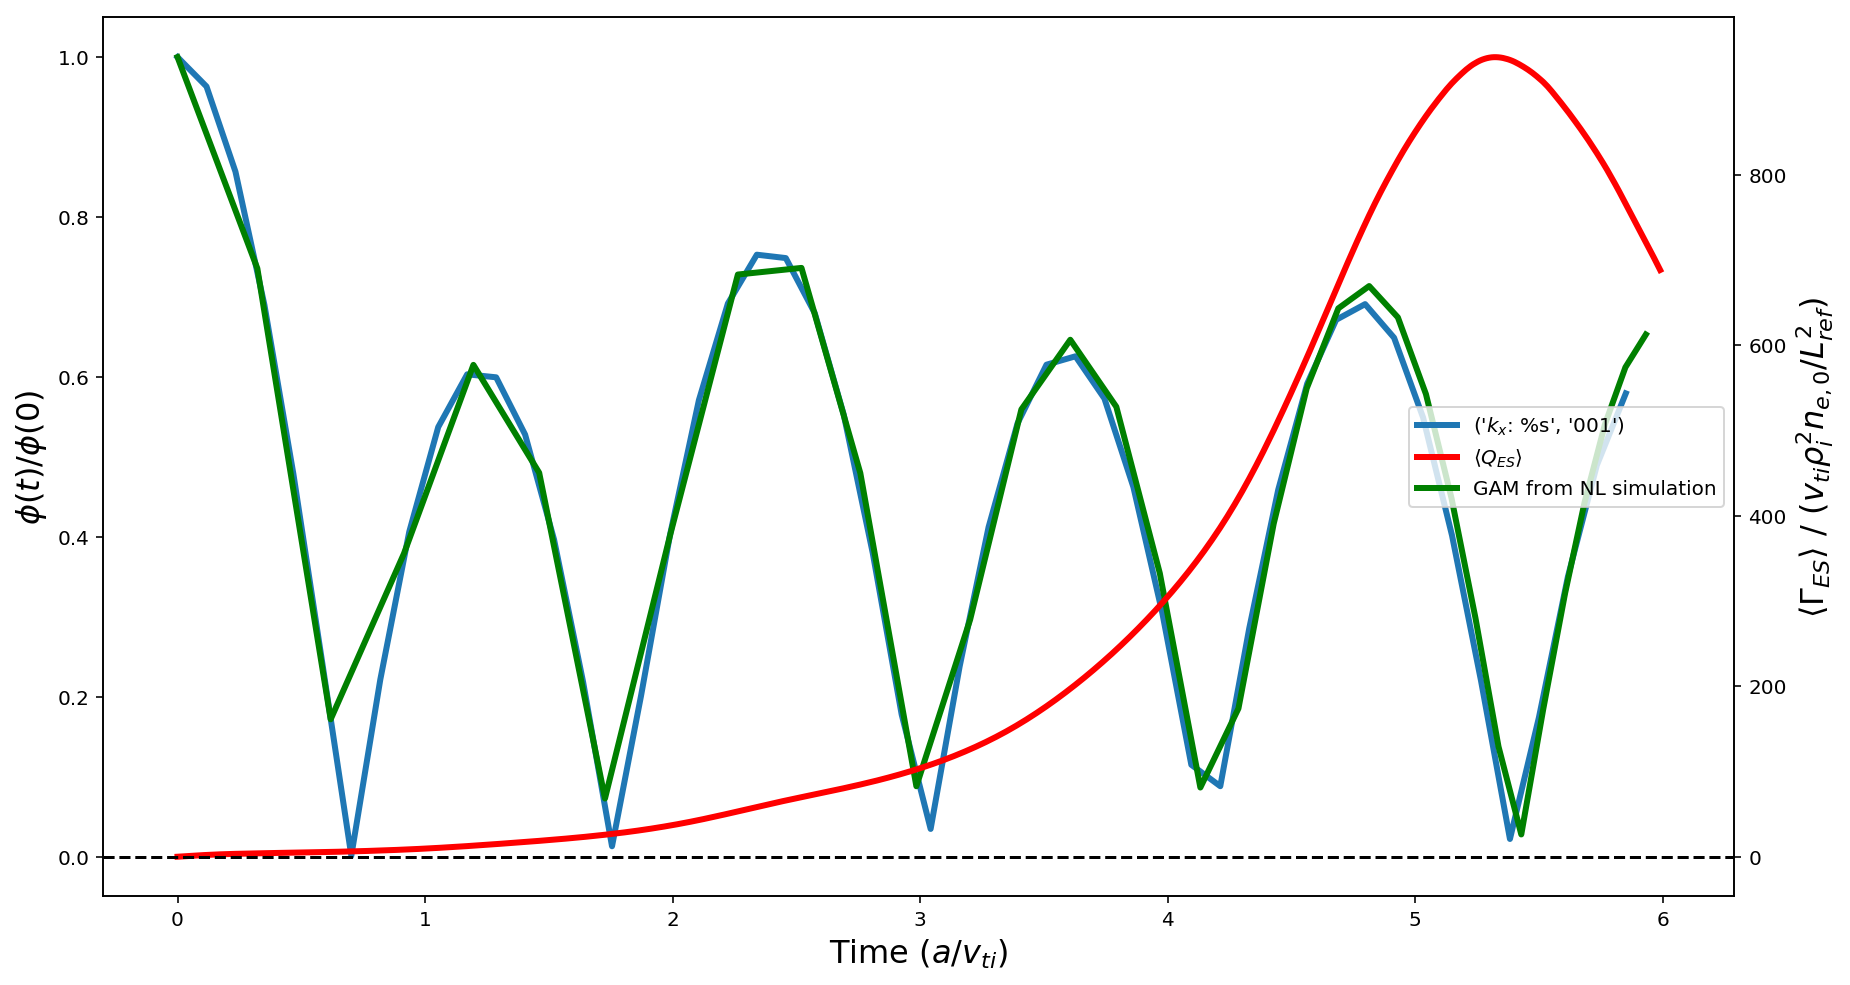

[[Model]]
    Model(line)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 16
    # data points      = 35
    # variables        = 2
    chi-square         = 0.56309734
    reduced chi-square = 0.01706356
    Akaike info crit   = -140.537779
    Bayesian info crit = -137.427083
[[Variables]]
    slope:     -2.02714484 +/- 0.01850560 (0.91%) (init = -1.96)
    intercept: -1.17983051 +/- 0.00282262 (0.24%) (init = -1.42)
[[Correlations]] (unreported correlations are < 0.250)
    C(slope, intercept) =  0.632



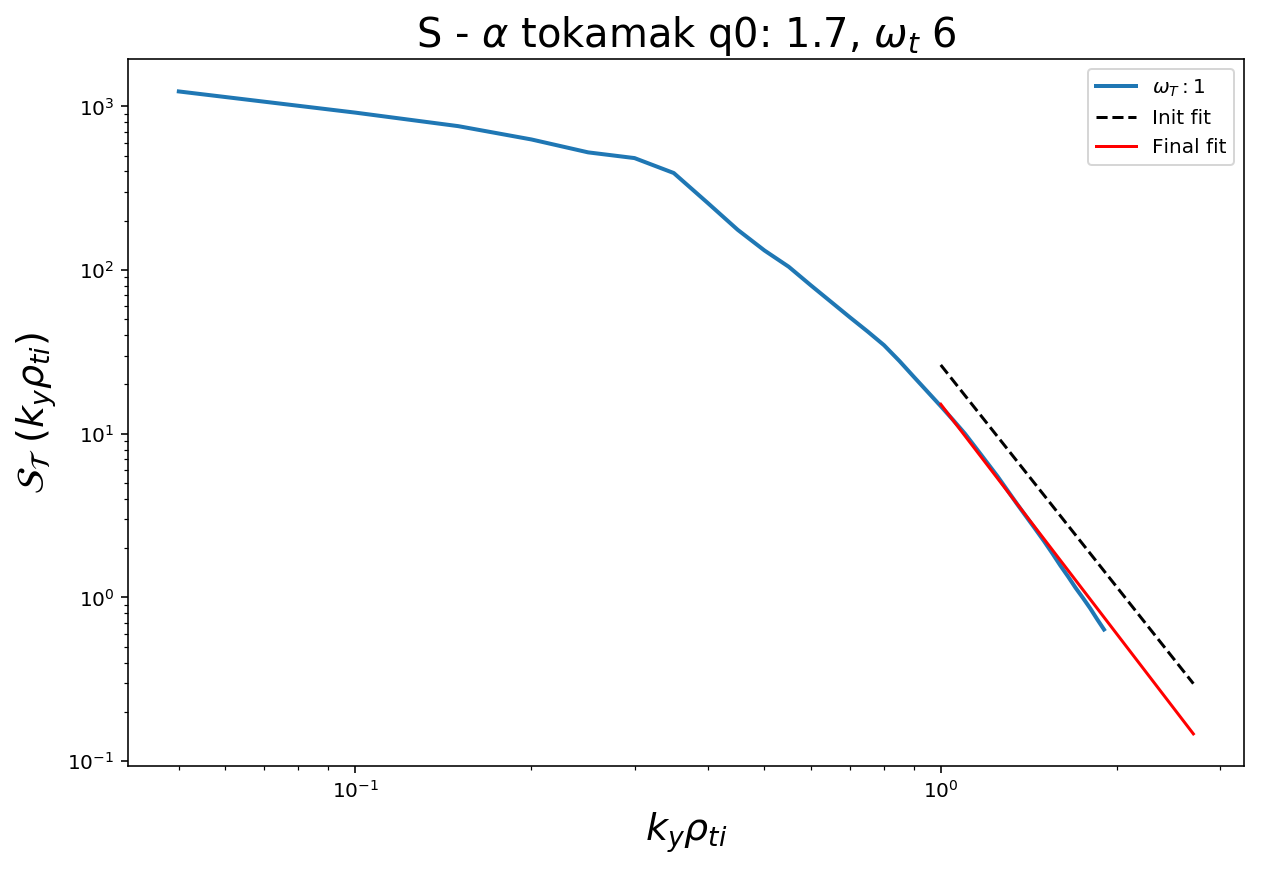

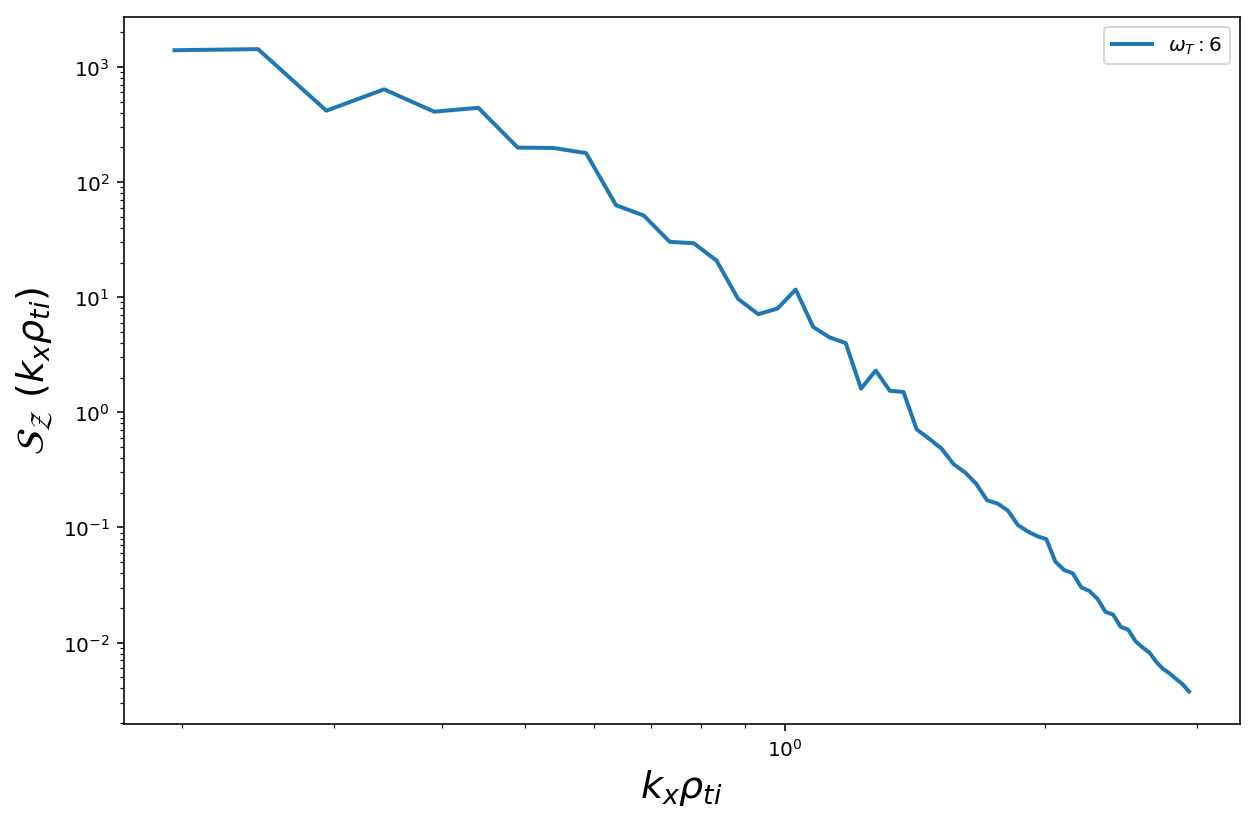

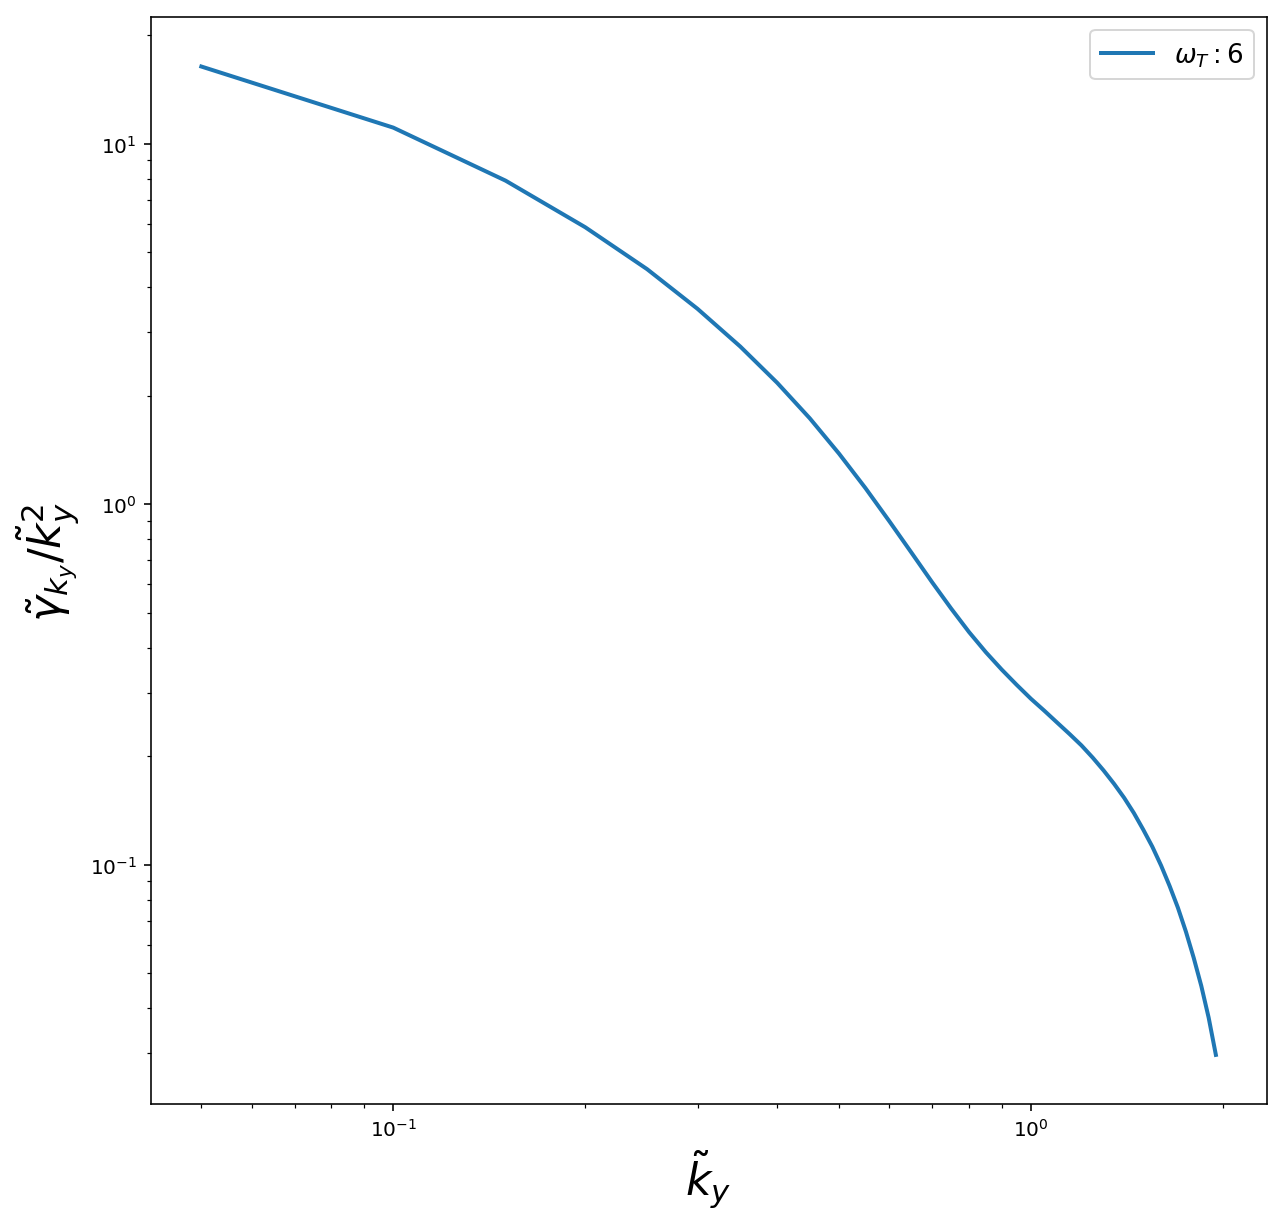

S-alpha geometry q0: 1.7 omt:6
S_T slope   -2.0271448433062713
T total:    270.15230148045
Z total:    238.1638566165102
Sum g/k^2:  65.49164175344184
Tzf:        [2.605574738367296]


In [24]:
#555555555555555555555555555555555555555#
#5 STee maker & file loader            5#
#5 for S-alpha geometry, q0=1.7, omt=6 5#
#555555555555555555555555555555555555555#

# Load data
sa = [( pylab.loadtxt('q0-1.7/ITGa_NL/omt6/diag_ing/spectraions_act.dat',usecols = (0, 1)))][0]

#### Simulation parameters
nkx0 = 384
nky0 = 64
Lx = 128.205
kx_minimum = 0.049
ky_minimum = 0.05
t_final = 78.809875
t_sat = 8.5

Ts_sa17omt6 = 350         # Simulation temperature
TN_sa17omt6 = 2160        # Model reference temperature
rhos_sa17omt6 = 0.0027    # Simulation gyroradius
rhoN_sa17omt6 = 0.0018    # Model reference gyroradius

#### Geomertic parameters (Not very relevant)
q0       =    1.7
shat     =   0.78
trpeps   =   0.10
major_R  =    4.0

top = np.int(nkx0/2)

######################## Containers:
ky_sa17omt6 = np.zeros((top, nky0))
phisa = np.zeros((top, nky0))
St_sa17omt6 = np.zeros((nky0))
########################

# Extract ky and Phi for each omt
for n in range(0, top):
    lo = (0+(nky0*n))
    hi = (nky0+(nky0*n))
    ky_sa17omt6[n] = sa[lo:hi, 0]
    phisa[n] = sa[lo:hi, 1]
    np.add(St_sa17omt6, phisa[n]/ky_minimum, out=St_sa17omt6, where=True)

kx_salpha17, tzf_sa17omt6, E, t, f_s, label, tzf_sa17omt6_nl = diag('q0-1.7', maxlim=1, plot=True, Lx=Lx, nkx0=nkx0, omt=6, mxtime=6)
hi = (nky0+(nky0*(top-1)))
kx_sa17omt6 = sa[hi:(hi+top), 0]
Sz_sa17omt6 = sa[hi:(hi+top), 1]/kx_minimum

idx = (np.abs(kx_sa17omt6 - 0.2)).argmin()  # Implies that the minimum kx to compare comes from NL
x_cut = (np.abs(kx_sa17omt6 - 3.0)).argmin()
kx_sa17omt6 = kx_sa17omt6[idx:x_cut]                    #
Sz_sa17omt6 = Sz_sa17omt6[idx:x_cut]                    #

#OSrat = my_data_salpha17[3, :]
#tzf_sa17omt6 = tzf_sa17omt6[min(range(len(kx_salpha17)), key=lambda i: abs(kx_salpha17[i]-0.1))]

idx2 = (np.abs(ky_sa17omt6 - 1.0)).argmin()
idx2f = idx2+35
Y = St_sa17omt6[idx2:idx2f]
X = ky_sa17omt6[1, idx2:idx2f]
pars = mod.make_params(intercept=-1.42, slope=-1.96)
out = mod.fit(Y, pars, x=X, nan_policy='propagate')
print(out.fit_report(min_correl=0.25))

ky_cut = (np.abs(ky_sa17omt6[1, 1:] - 2.0)).argmin()
ky_sa17omt6 = ky_sa17omt6[1, 1:ky_cut]
St_sa17omt6 = St_sa17omt6[1:ky_cut]

plt.figure(figsize=(10, 6.5))
plt.title("S - $\\alpha$ tokamak q0: 1.7, $\omega _{t}$ 6", fontsize=20)
plt.plot(ky_sa17omt6, St_sa17omt6, linewidth=2)  # Printing: the truncated range with normalisation
plt.plot(X, out.init_fit, 'k--')
plt.plot(X, out.best_fit, 'r-')
plt.legend(['$\omega_{T}: 1$', 'Init fit', 'Final fit'], fontsize=10)
plt.xscale('log')
plt.yscale('log')
pylab.xlabel('$k_{y}  \\rho_{ti}$',fontsize=19)
pylab.ylabel('$\mathcal{S}_{\mathcal{T}} \ (k_{y} \\rho_{ti})$',fontsize=19)
#plt.savefig('salpha17_st_plot.eps', format='eps', dpi=1200)
plt.show()

plt.figure(figsize=(10, 6.5))
plt.plot(kx_sa17omt6, Sz_sa17omt6, linewidth=2)
plt.xscale('log')
plt.yscale('log')
pylab.xlabel('$k_{x}  \\rho_{ti}$',fontsize=19)
pylab.ylabel('$\mathcal{S}_{\mathcal{Z}} \ (k_{x} \\rho_{ti})$',fontsize=19)
plt.legend(['$\omega_{T}: 6$', '$\\tau_{ZF}$', 'Overshoot Ratio'], fontsize=10)
#plt.savefig('salpha17_sz_plot.eps', format='eps', dpi=1200)
plt.show()

####### Load Linear simulations growth rates #######
dataset1 = [('./q0-1.7/ITGa_l/omt6.dat')]
datalist_1 = [ ( pylab.loadtxt(datapath,usecols = (0, 2, 4, 5))) for datapath in dataset1]
datalist_1 = datalist_1[0]
ky_min1 = datalist_1[:, 1]
gamma1 = datalist_1[:, 2]
omega1 = datalist_1[:, 3]

k1 = ky_min1[:ky_cut]
g1 = gamma1[:ky_cut]

plt.figure(figsize=(10, 10))
plt.plot(k1, g1/(k1**2), linewidth=2)
plt.xscale('log')
plt.yscale('log')
plt.legend(['$\omega_{T}: 6$'], fontsize=13)
plt.xlabel('$\\tilde{k}_{y}$',fontsize=22)
plt.ylabel('$\\tilde{\gamma}_{k_{y}} / \\tilde{k}^{2}_{y}$',fontsize=22)
plt.show()

appT_salpha17omt6 = np.nansum(g1/(k1**2))
te_salpha17omt6 = trapz(St_sa17omt6, x=ky_sa17omt6)
zet_salpha17omt6 = trapz(Sz_sa17omt6, x=kx_sa17omt6)
slope_salpha17omt6, intercept = out.best_values.values()

print('S-alpha geometry q0: 1.7 omt:6')
print('S_T slope  ', slope_salpha17omt6)
print('T total:   ', te_salpha17omt6)
print('Z total:   ', zet_salpha17omt6)
print('Sum g/k^2: ', appT_salpha17omt6)
print('Tzf:       ', tzf_sa17omt6)

#555555555555555555555555555555555555555#
#5 STee maker & file loader            5#
#5 for S-alpha geometry, q0=1.7, omt=6 5#
#555555555555555555555555555555555555555#

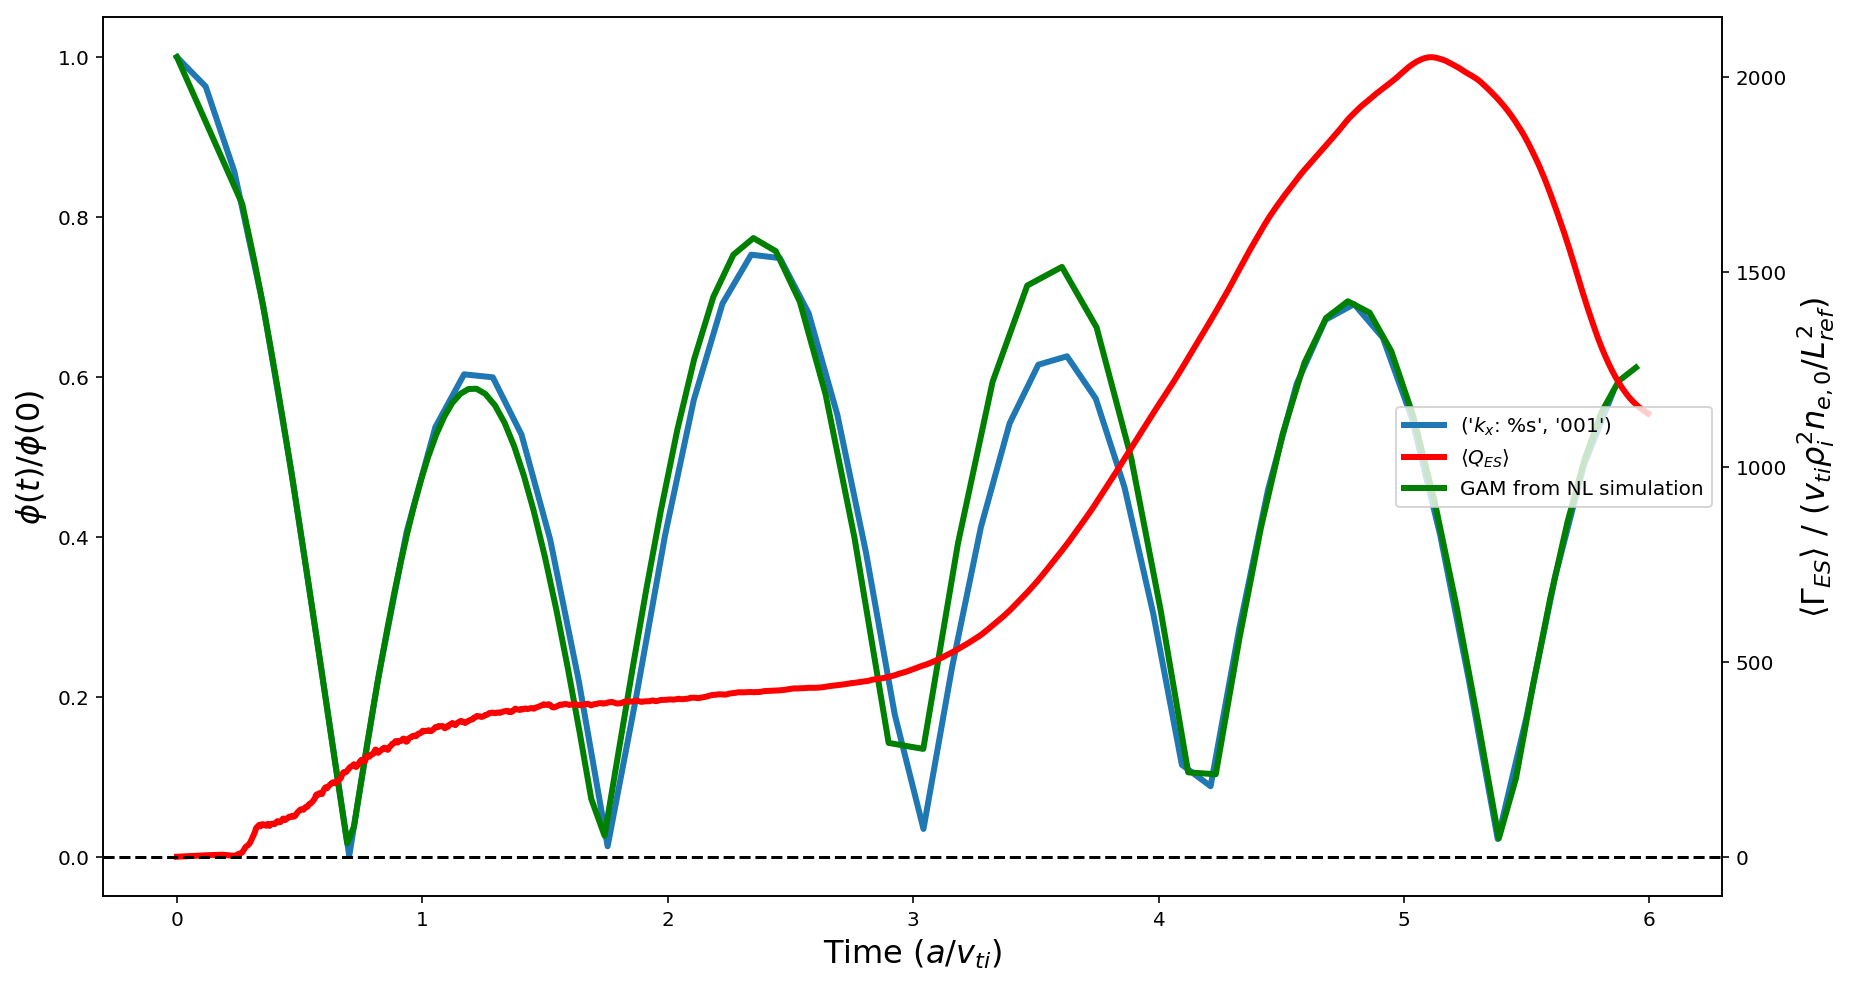

[[Model]]
    Model(line)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 26
    # data points      = 35
    # variables        = 2
    chi-square         = 154.139777
    reduced chi-square = 4.67090233
    Akaike info crit   = 55.8879120
    Bayesian info crit = 58.9986081
[[Variables]]
    slope:     -1.19844434 +/- 0.04410029 (3.68%) (init = -1.96)
    intercept: -1.69078663 +/- 0.01194700 (0.71%) (init = -1.42)
[[Correlations]] (unreported correlations are < 0.250)
    C(slope, intercept) =  0.691



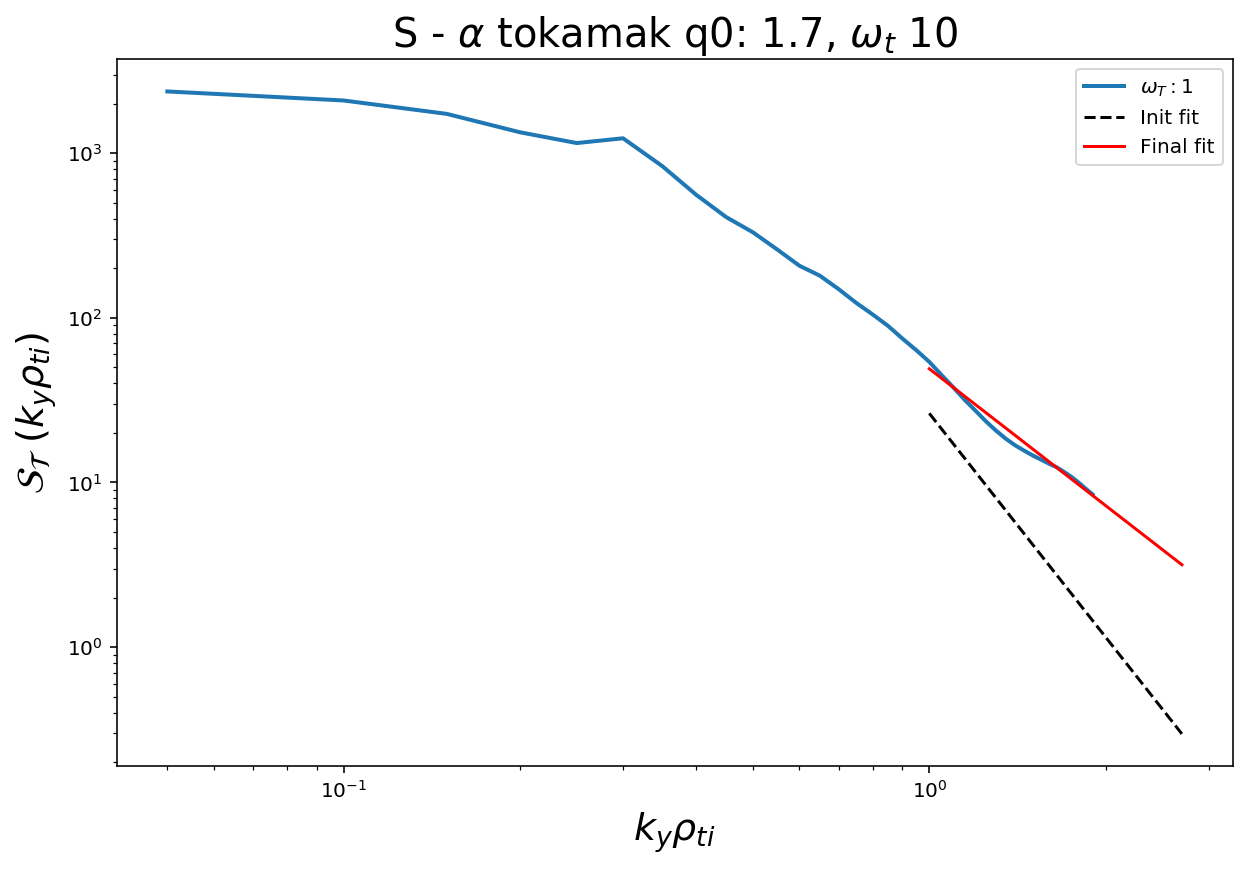

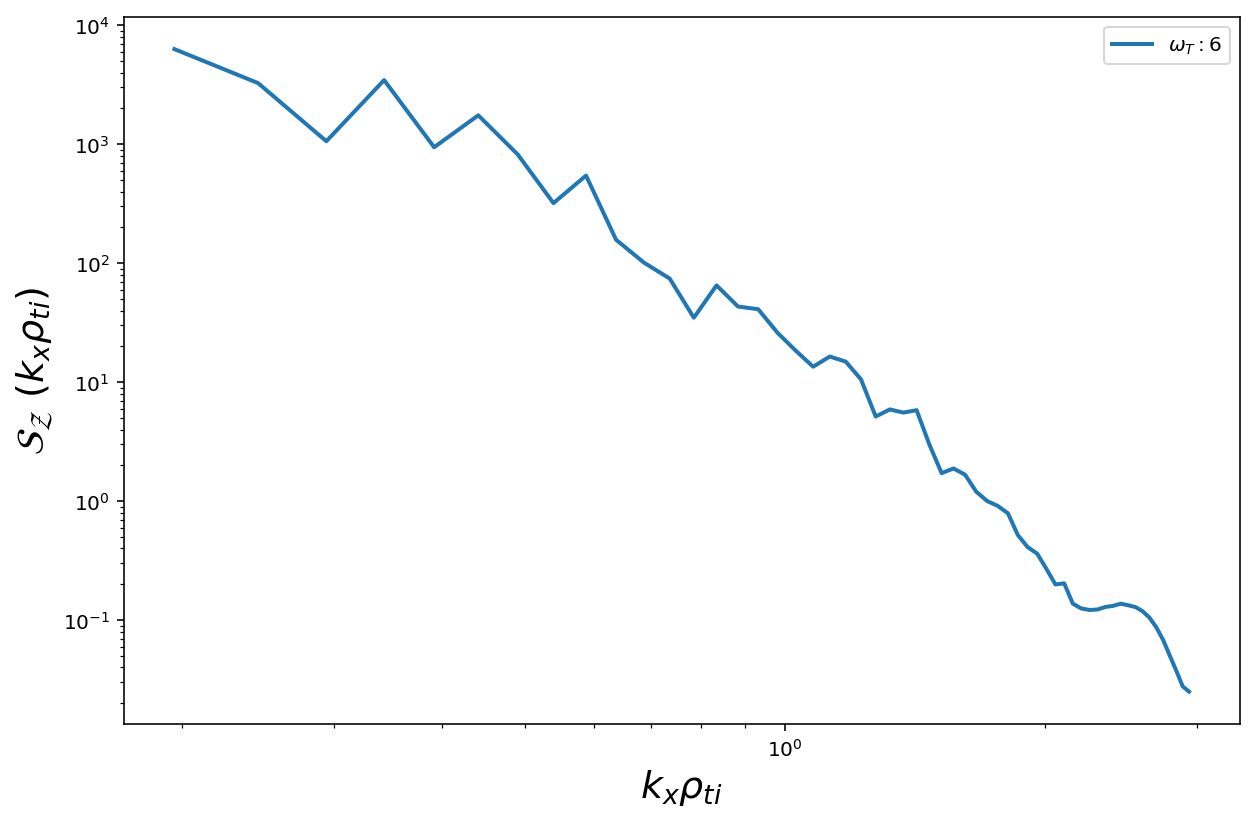

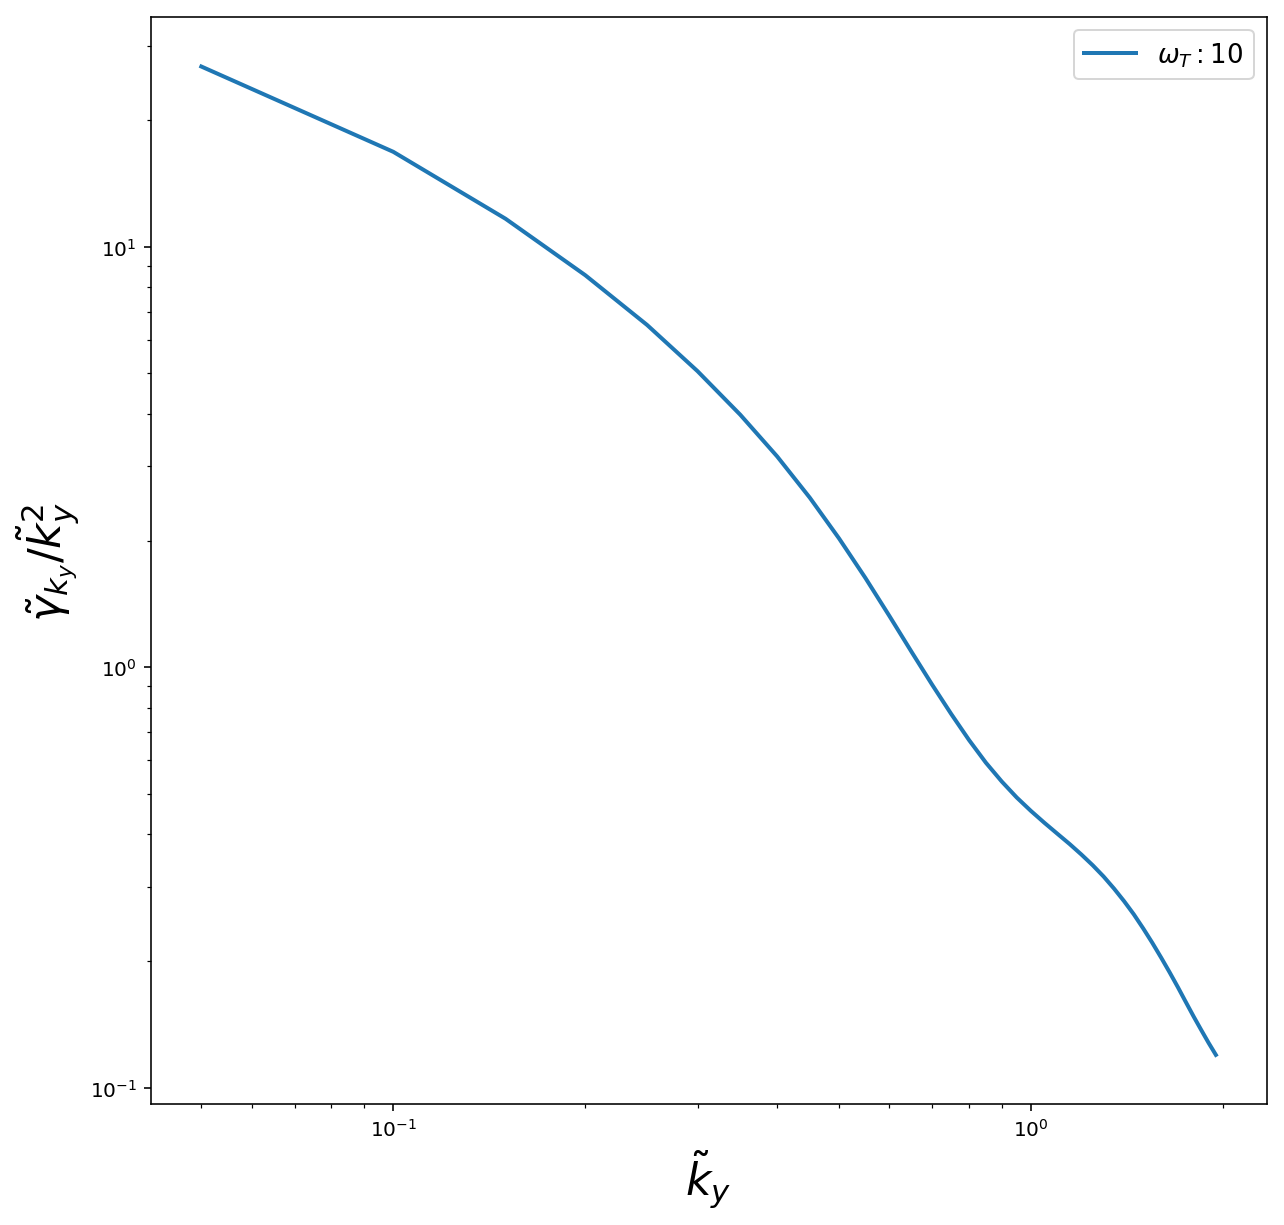

S-alpha geometry q0: 1.7 omt:6
S_T slope   -1.1984443382725136
T total:    625.5035292199998
Z total:    781.7772383786735
Sum g/k^2:  100.30050654261854
Tzf:        [2.605574738367296]


In [25]:
#6666666666666666666666666666666666666666#
#6 STee maker & file loader             6#
#6 for S-alpha geometry, q0=1.7, omt=10 6#
#6666666666666666666666666666666666666666#

# Load data
sa = [( pylab.loadtxt('q0-1.7/ITGa_NL/omt10/diag_ing/spectraions_act.dat',usecols = (0, 1)))][0]

#### Simulation parameters
nkx0 = 384
nky0 = 64
Lx = 128.205
kx_minimum = 0.049
ky_minimum = 0.05
t_final = 44.048209
t_sat = 10

Ts_sa17omt10 = 350         # Simulation temperature
TN_sa17omt10 = 2160        # Model reference temperature
rhos_sa17omt10 = 0.0027    # Simulation gyroradius
rhoN_sa17omt10 = 0.0018    # Model reference gyroradius

#### Geomertic parameters (Not very relevant)
q0       =    1.7
shat     =   0.78
trpeps   =   0.10
major_R  =    4.0

top = np.int(nkx0/2)

######################## Containers:
ky_sa17omt10 = np.zeros((top, nky0))
phisa = np.zeros((top, nky0))
St_sa17omt10 = np.zeros((nky0))
########################

# Extract ky and Phi for each omt
for n in range(0, top):
    lo = (0+(nky0*n))
    hi = (nky0+(nky0*n))
    ky_sa17omt10[n] = sa[lo:hi, 0]
    phisa[n] = sa[lo:hi, 1]
    np.add(St_sa17omt10, phisa[n]/ky_minimum, out=St_sa17omt10, where=True)

kx_salpha17, tzf_sa17omt10, E, t, f_s, label, tzf_sa17omt10_nl = diag('q0-1.7', maxlim=1, plot=True, Lx=Lx, nkx0=nkx0, omt=10, mxtime=6)
hi = (nky0+(nky0*(top-1)))
kx_sa17omt10 = sa[hi:(hi+top), 0]
Sz_sa17omt10 = sa[hi:(hi+top), 1]/kx_minimum

idx = (np.abs(kx_sa17omt10 - 0.2)).argmin()  # Implies that the minimum kx to compare comes from NL
x_cut = (np.abs(kx_sa17omt10 - 3.0)).argmin()
kx_sa17omt10 = kx_sa17omt10[idx:x_cut]                    #
Sz_sa17omt10 = Sz_sa17omt10[idx:x_cut]                    #

#OSrat = my_data_salpha17[3, :]
#tzf_sa17omt10 = tzf_sa17omt10[min(range(len(kx_salpha17)), key=lambda i: abs(kx_salpha17[i]-0.1))]

idx2 = (np.abs(ky_sa17omt10 - 1.0)).argmin()
idx2f = idx2+35
Y = St_sa17omt10[idx2:idx2f]
X = ky_sa17omt10[1, idx2:idx2f]
pars = mod.make_params(intercept=-1.42, slope=-1.96)
out = mod.fit(Y, pars, x=X, nan_policy='propagate')
print(out.fit_report(min_correl=0.25))

ky_cut = (np.abs(ky_sa17omt10[1, 1:] - 2.0)).argmin()
ky_sa17omt10 = ky_sa17omt10[1, 1:ky_cut]
St_sa17omt10 = St_sa17omt10[1:ky_cut]

plt.figure(figsize=(10, 6.5))
plt.title("S - $\\alpha$ tokamak q0: 1.7, $\omega _{t}$ 10", fontsize=20)
plt.plot(ky_sa17omt10, St_sa17omt10, linewidth=2)  # Printing: the truncated range with normalisation
plt.plot(X, out.init_fit, 'k--')
plt.plot(X, out.best_fit, 'r-')
plt.legend(['$\omega_{T}: 1$', 'Init fit', 'Final fit'], fontsize=10)
plt.xscale('log')
plt.yscale('log')
pylab.xlabel('$k_{y}  \\rho_{ti}$',fontsize=19)
pylab.ylabel('$\mathcal{S}_{\mathcal{T}} \ (k_{y} \\rho_{ti})$',fontsize=19)
#plt.savefig('salpha17_st_plot.eps', format='eps', dpi=1200)
plt.show()

plt.figure(figsize=(10, 6.5))
plt.plot(kx_sa17omt10, Sz_sa17omt10, linewidth=2)
plt.xscale('log')
plt.yscale('log')
pylab.xlabel('$k_{x}  \\rho_{ti}$',fontsize=19)
pylab.ylabel('$\mathcal{S}_{\mathcal{Z}} \ (k_{x} \\rho_{ti})$',fontsize=19)
plt.legend(['$\omega_{T}: 6$', '$\\tau_{ZF}$', 'Overshoot Ratio'], fontsize=10)
#plt.savefig('salpha17_sz_plot.eps', format='eps', dpi=1200)
plt.show()

####### Load Linear simulations growth rates #######
dataset1 = [('./q0-1.7/ITGa_l/omt10.dat')]
datalist_1 = [ ( pylab.loadtxt(datapath,usecols = (0, 2, 4, 5))) for datapath in dataset1]
datalist_1 = datalist_1[0]
ky_min1 = datalist_1[:, 1]
gamma1 = datalist_1[:, 2]
omega1 = datalist_1[:, 3]

k1 = ky_min1[:ky_cut]
g1 = gamma1[:ky_cut]

plt.figure(figsize=(10, 10))
plt.plot(k1, g1/(k1**2), linewidth=2)
plt.xscale('log')
plt.yscale('log')
plt.legend(['$\omega_{T}: 10$'], fontsize=13)
plt.xlabel('$\\tilde{k}_{y}$',fontsize=22)
plt.ylabel('$\\tilde{\gamma}_{k_{y}} / \\tilde{k}^{2}_{y}$',fontsize=22)
plt.show()

appT_salpha17omt10 = np.nansum(g1/(k1**2))
te_salpha17omt10 = trapz(St_sa17omt10, x=ky_sa17omt10)
zet_salpha17omt10 = trapz(Sz_sa17omt10, x=kx_sa17omt10)
slope_salpha17omt10, intercept = out.best_values.values()

print('S-alpha geometry q0: 1.7 omt:6')
print('S_T slope  ', slope_salpha17omt10)
print('T total:   ', te_salpha17omt10)
print('Z total:   ', zet_salpha17omt10)
print('Sum g/k^2: ', appT_salpha17omt10)
print('Tzf:       ', tzf_sa17omt10)

#6666666666666666666666666666666666666666#
#6 STee maker & file loader             6#
#6 for S-alpha geometry, q0=1.7, omt=10 6#
#6666666666666666666666666666666666666666#

[[Model]]
    Model(line2)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 6
    # data points      = 6
    # variables        = 2
    chi-square         = 11027.7611
    reduced chi-square = 2756.94029
    Akaike info crit   = 49.0984699
    Bayesian info crit = 48.6819888
[[Variables]]
    slope:      11.3251010 +/- 1.18965091 (10.50%) (init = 8)
    intercept: -456.170582 +/- 90.9647274 (19.94%) (init = 16)
[[Correlations]] (unreported correlations are < 0.250)
    C(slope, intercept) = -0.972

the slope is: 11.325100992029274


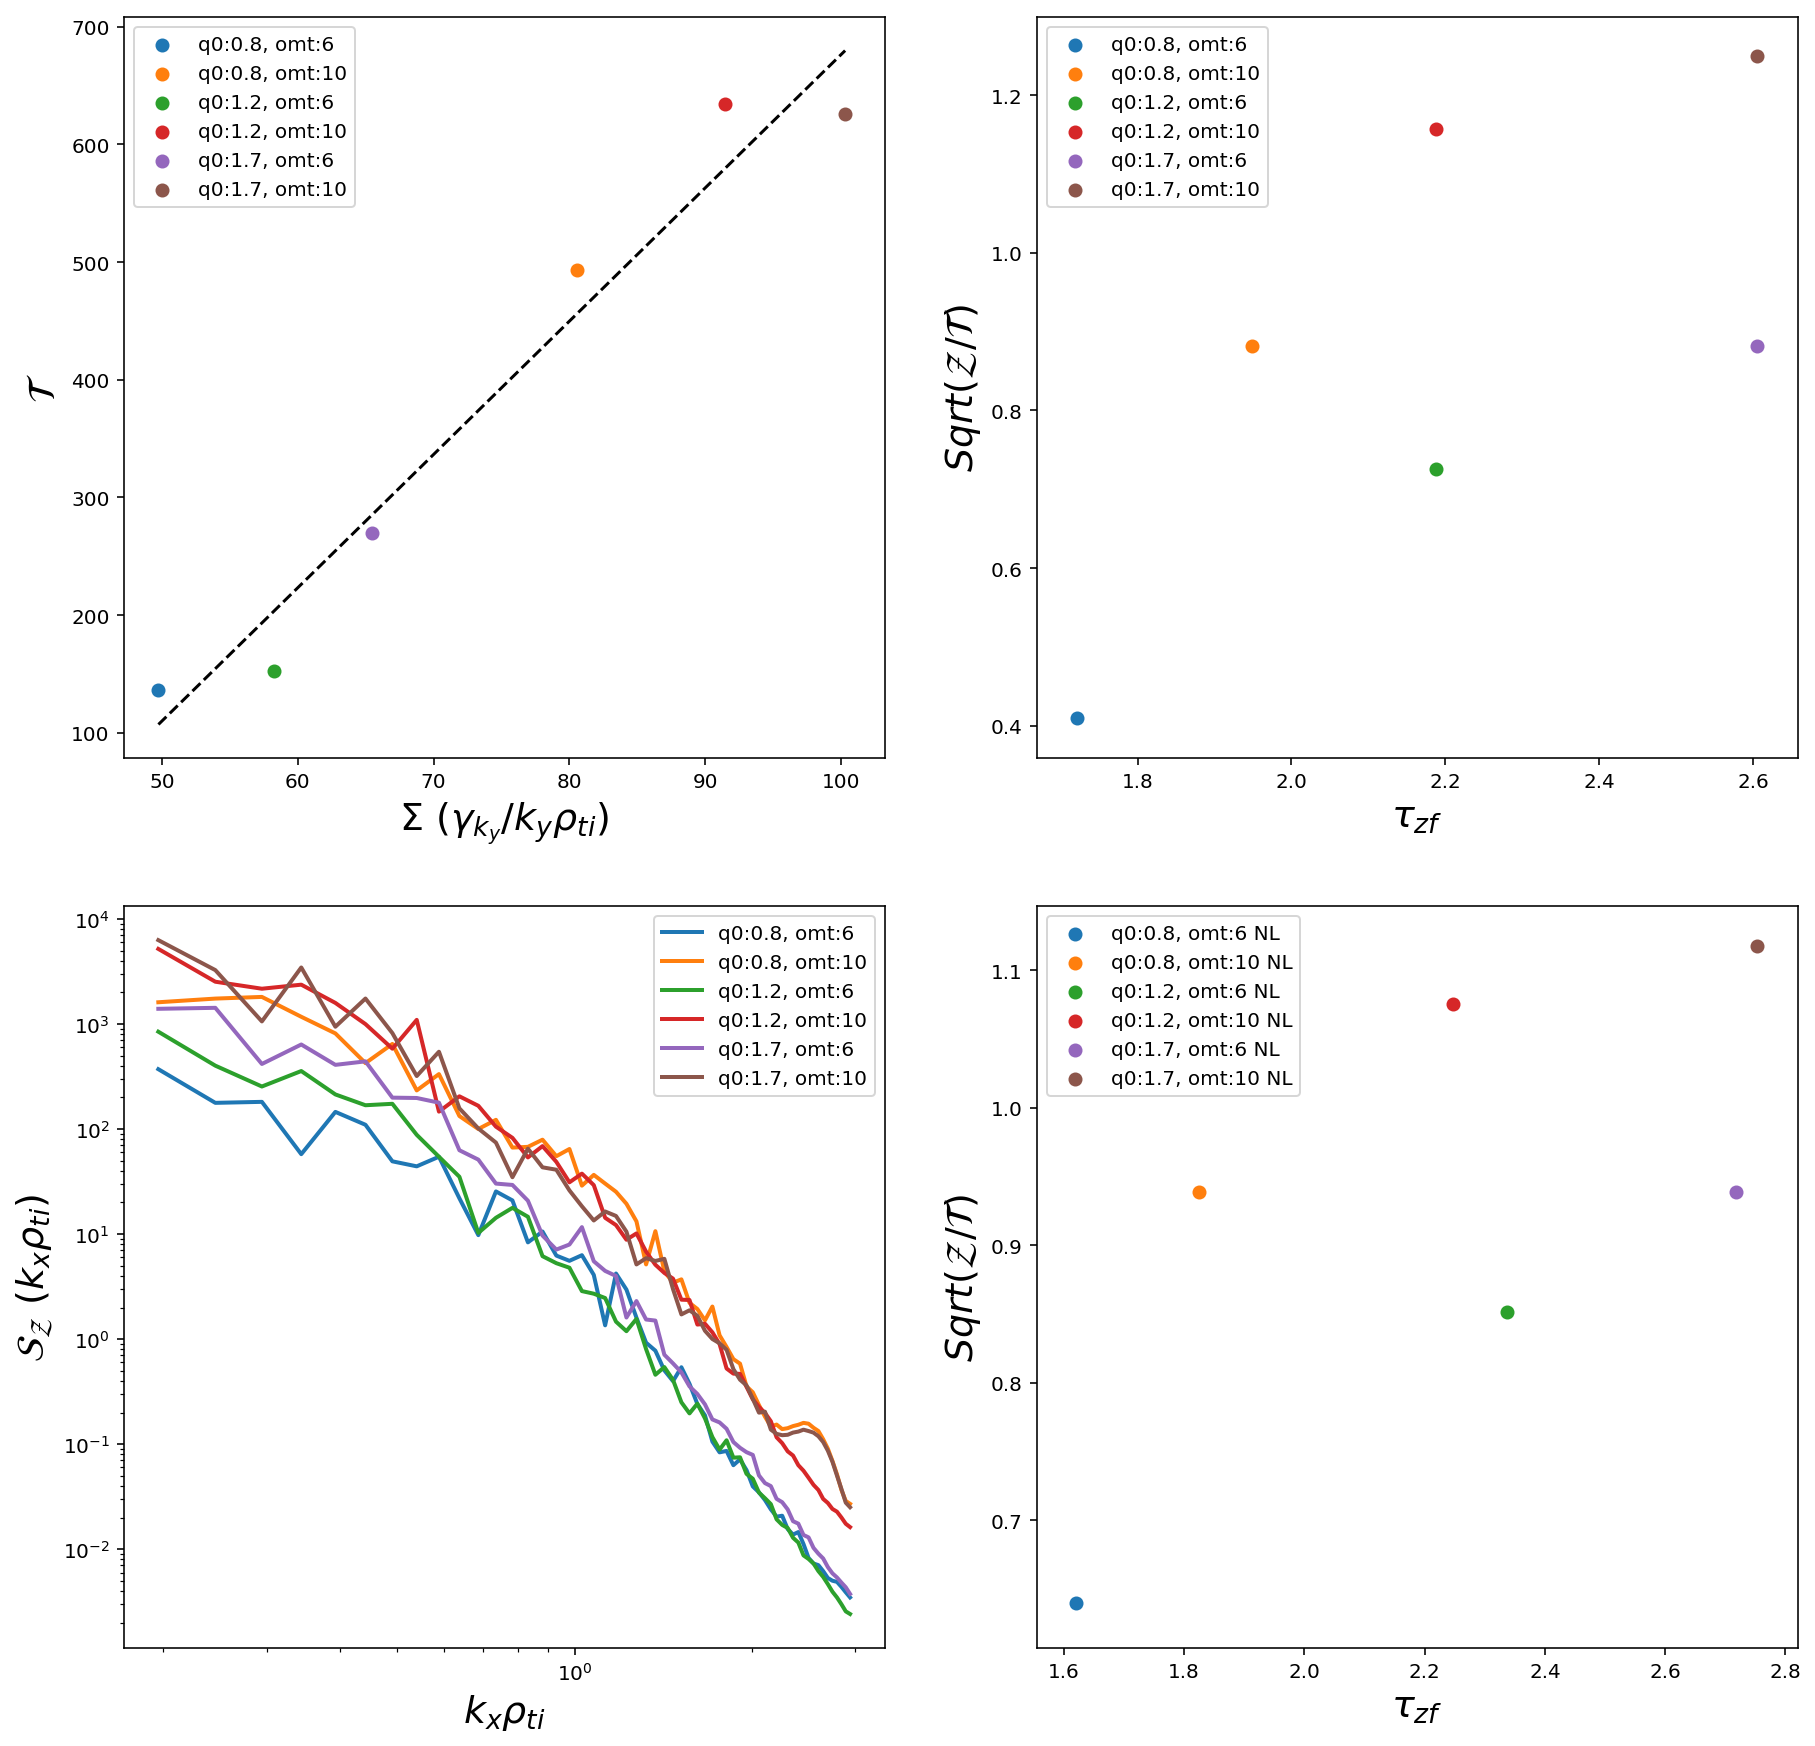

In [42]:
######################################## PUT ALL THE IMPORTANT DATA HERE  ############################################

salpha_slope = np.array([slope_salpha08omt6,
                         slope_salpha08omt10,
                         slope_salpha12omt6,
                         slope_salpha12omt10,
                         slope_salpha17omt6,
                         slope_salpha17omt10])

salpha_te = np.array([te_salpha08omt6,
                      te_salpha08omt10,
                      te_salpha12omt6,
                      te_salpha12omt10,
                      te_salpha17omt6,
                      te_salpha17omt10])

salpha_zet = np.array([zet_salpha08omt6,
                       zet_salpha08omt10,
                       zet_salpha12omt6,
                       zet_salpha12omt10,
                       zet_salpha17omt6,
                       zet_salpha17omt10])

salpha_sigma = np.array([appT_salpha08omt6,
                         appT_salpha08omt10,
                         appT_salpha12omt6,
                         appT_salpha12omt10,
                         appT_salpha17omt6,
                         appT_salpha17omt10])

salpha_zf = np.array([tzf_sa08omt6,
                      tzf_sa08omt10,
                      tzf_sa12omt6,
                      tzf_sa12omt10,
                      tzf_sa17omt6,
                      tzf_sa17omt10])

salpha_zf_nl = np.array([tzf_sa08omt6_nl,
                         tzf_sa08omt10_nl,
                         tzf_sa12omt6_nl,
                         tzf_sa12omt10_nl,
                         tzf_sa17omt6_nl,
                         tzf_sa17omt10_nl])

slope_salpha, intercept, r_value, p_value, std_err = stats.linregress(salpha_sigma, salpha_te)
mod2 = Model(line2)
pars = mod2.make_params(intercept=16, slope=8.0)
out = mod2.fit(salpha_te, pars, x=salpha_sigma, nan_policy='propagate')
x = np.linspace(min(salpha_sigma), max(salpha_sigma), len(out.best_fit))
y = line2(x, slope_salpha, intercept)
print(out.fit_report(min_correl=0.25))


fig = plt.figure(figsize=(15, 15))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

ax1.scatter(salpha_sigma[0], salpha_te[0], label='q0:0.8, omt:6')
ax1.scatter(salpha_sigma[1], salpha_te[1], label='q0:0.8, omt:10')
ax1.scatter(salpha_sigma[2], salpha_te[2], label='q0:1.2, omt:6')
ax1.scatter(salpha_sigma[3], salpha_te[3], label='q0:1.2, omt:10')
ax1.scatter(salpha_sigma[4], salpha_te[4], label='q0:1.7, omt:6')
ax1.scatter(salpha_sigma[5], salpha_te[5], label='q0:1.7, omt:10')
ax1.plot(x, y, 'k--')

ax1.set_ylabel('$\mathcal{T}$', fontsize=19)
ax1.set_xlabel('$\Sigma \ (\gamma_{k_{y}} / k_{y}\\rho_{ti})$', fontsize=19)
ax1.legend()
#plt.savefig('tau_sum_plot.eps', format='eps', dpi=1200)
print('the slope is:', slope_salpha)

#ax2.scatter(0, salpha_slope[0], label='q0:0.8, omt:6')
#ax2.scatter(1, salpha_slope[1], label='q0:0.8, omt:10')
#ax2.scatter(2, salpha_slope[2], label='q0:1.2, omt:6')
#ax2.scatter(3, salpha_slope[3], label='q0:1.2, omt:10')
#ax2.scatter(4, salpha_slope[4], label='q0:1.7, omt:6')

ax2.scatter(salpha_zf[0], (salpha_zet[0])/(salpha_te[0]), label='q0:0.8, omt:6')
ax2.scatter(salpha_zf[1], (salpha_zet[1])/(salpha_te[1]), label='q0:0.8, omt:10')
ax2.scatter(salpha_zf[2], (salpha_zet[2])/(salpha_te[2]), label='q0:1.2, omt:6')
ax2.scatter(salpha_zf[3], (salpha_zet[3])/(salpha_te[3]), label='q0:1.2, omt:10')
ax2.scatter(salpha_zf[4], (salpha_zet[4])/(salpha_te[4]), label='q0:1.7, omt:6')
ax2.scatter(salpha_zf[5], (salpha_zet[5])/(salpha_te[5]), label='q0:1.7, omt:10')

ax2.set_ylabel('$Sqrt(\mathcal{Z}/\mathcal{T})$', fontsize=19)
ax2.set_xlabel('$\\tau_{zf}$', fontsize=19)
ax2.legend()

ax3.plot(kx_sa08omt6, Sz_sa08omt6, linewidth=2, label='q0:0.8, omt:6')
ax3.plot(kx_sa08omt10, Sz_sa08omt10, linewidth=2, label='q0:0.8, omt:10')
ax3.plot(kx_sa12omt6, Sz_sa12omt6, linewidth=2, label='q0:1.2, omt:6')
ax3.plot(kx_sa12omt10, Sz_sa12omt10, linewidth=2, label='q0:1.2, omt:10')
ax3.plot(kx_sa17omt6, Sz_sa17omt6, linewidth=2, label='q0:1.7, omt:6')
ax3.plot(kx_sa17omt10, Sz_sa17omt10, linewidth=2, label='q0:1.7, omt:10')

ax3.set_xscale('log')
ax3.set_yscale('log')
ax3.set_xlabel('$k_{x}  \\rho_{ti}$',fontsize=19)
ax3.set_ylabel('$\mathcal{S}_{\mathcal{Z}} \ (k_{x} \\rho_{ti})$',fontsize=19)
ax3.legend(fontsize=10)

ax4.scatter(salpha_zf_nl[0], np.sqrt(salpha_zet[0]/salpha_te[0]), label='q0:0.8, omt:6 NL')
ax4.scatter(salpha_zf_nl[1], np.sqrt(salpha_zet[1]/salpha_te[1]), label='q0:0.8, omt:10 NL')
ax4.scatter(salpha_zf_nl[2], np.sqrt(salpha_zet[2]/salpha_te[2]), label='q0:1.2, omt:6 NL')
ax4.scatter(salpha_zf_nl[3], np.sqrt(salpha_zet[3]/salpha_te[3]), label='q0:1.2, omt:10 NL')
ax4.scatter(salpha_zf_nl[4], np.sqrt(salpha_zet[4]/salpha_te[4]), label='q0:1.7, omt:6 NL')
ax4.scatter(salpha_zf_nl[5], np.sqrt(salpha_zet[5]/salpha_te[5]), label='q0:1.7, omt:10 NL')

ax4.set_ylabel('$Sqrt(\mathcal{Z}/\mathcal{T})$', fontsize=19)
ax4.set_xlabel('$\\tau_{zf}$', fontsize=19)
ax4.legend()
plt.show()

salpha = np.sqrt(salpha_zet/salpha_te)
tau = salpha_zf
tau_nl = salpha_zf_nl
slope_salpha, intercept, r_value, p_value, std_err = stats.linregress(tau[:, 0], tau_nl)

the slope is: 1.2907122369493444


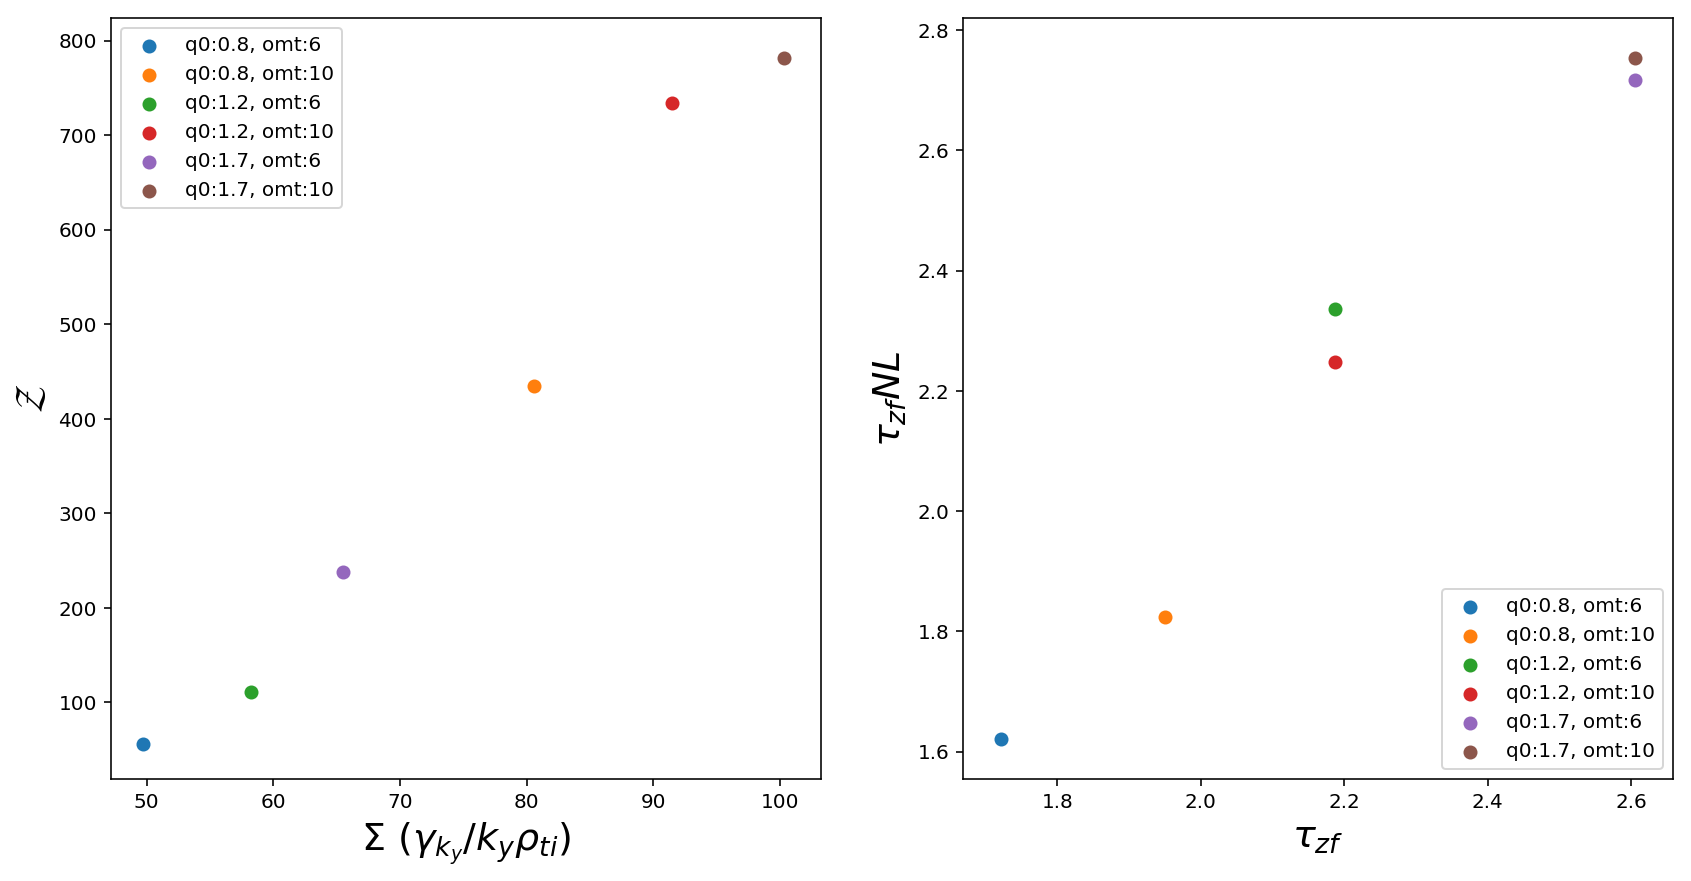

In [43]:
fig = plt.figure(figsize=(14, 7))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.scatter(salpha_sigma[0], salpha_zet[0], label='q0:0.8, omt:6')
ax1.scatter(salpha_sigma[1], salpha_zet[1], label='q0:0.8, omt:10')
ax1.scatter(salpha_sigma[2], salpha_zet[2], label='q0:1.2, omt:6')
ax1.scatter(salpha_sigma[3], salpha_zet[3], label='q0:1.2, omt:10')
ax1.scatter(salpha_sigma[4], salpha_zet[4], label='q0:1.7, omt:6')
ax1.scatter(salpha_sigma[5], salpha_zet[5], label='q0:1.7, omt:10')
ax1.set_ylabel('$\mathcal{Z}$', fontsize=19)
ax1.set_xlabel('$\Sigma \ (\gamma_{k_{y}} / k_{y}\\rho_{ti})$', fontsize=19)
ax1.legend()

ax2.scatter(tau[0], tau_nl[0], label='q0:0.8, omt:6')
ax2.scatter(tau[1], tau_nl[1], label='q0:0.8, omt:10')
ax2.scatter(tau[2], tau_nl[2], label='q0:1.2, omt:6')
ax2.scatter(tau[3], tau_nl[3], label='q0:1.2, omt:10')
ax2.scatter(tau[4], tau_nl[4], label='q0:1.7, omt:6')
ax2.scatter(tau[5], tau_nl[5], label='q0:1.7, omt:10')
ax2.set_ylabel('$\\tau_{zf} NL$', fontsize=19)
ax2.set_xlabel('$\\tau_{zf}$', fontsize=19)
ax2.legend(loc='lower right')
#plt.savefig('tau_sum_plot.eps', format='eps', dpi=1200)
print('the slope is:', slope_salpha)
plt.show()

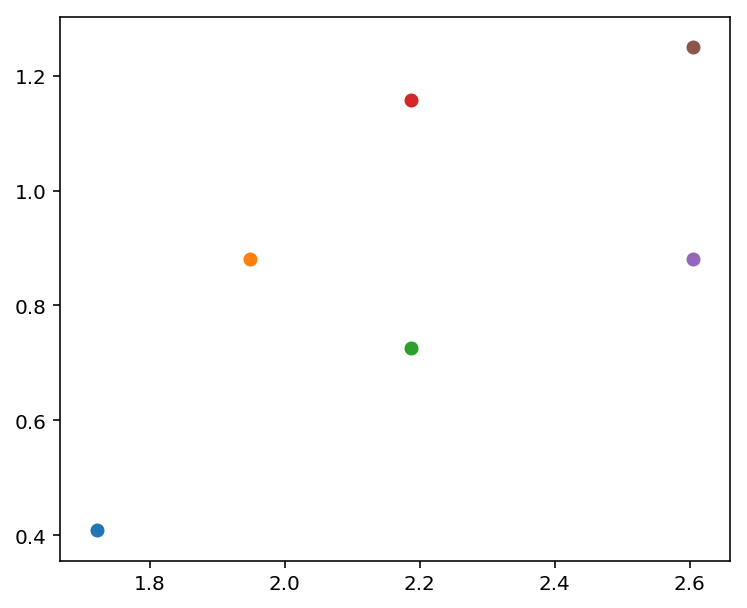

In [47]:
fig = plt.figure(figsize=(6, 5))

ax1 = fig.add_subplot(111)
#ax2 = fig.add_subplot(222)
#ax3 = fig.add_subplot(223)
#ax4 = fig.add_subplot(224)

#ax1.scatter(salpha_sigma[0], salpha_te[0], label='q0:0.8, omt:6')
#ax1.scatter(salpha_sigma[1], salpha_te[1], label='q0:0.8, omt:10')
#ax1.scatter(salpha_sigma[2], salpha_te[2], label='q0:1.2, omt:6')
#ax1.scatter(salpha_sigma[3], salpha_te[3], label='q0:1.2, omt:10')
#ax1.scatter(salpha_sigma[4], salpha_te[4], label='q0:1.7, omt:6')
#ax1.scatter(salpha_sigma[5], salpha_te[5], label='q0:1.7, omt:10')

ax1.scatter(salpha_zf[0], (salpha_zet[0])/(salpha_te[0]), label='q0:0.8, omt:6')
ax1.scatter(salpha_zf[1], (salpha_zet[1])/(salpha_te[1]), label='q0:0.8, omt:10')
ax1.scatter(salpha_zf[2], (salpha_zet[2])/(salpha_te[2]), label='q0:1.2, omt:6')
ax1.scatter(salpha_zf[3], (salpha_zet[3])/(salpha_te[3]), label='q0:1.2, omt:10')
ax1.scatter(salpha_zf[4], (salpha_zet[4])/(salpha_te[4]), label='q0:1.7, omt:6')
ax1.scatter(salpha_zf[5], (salpha_zet[5])/(salpha_te[5]), label='q0:1.7, omt:10')

#ax1.plot(x, y, 'k--')

#ax1.set_ylabel('$\mathcal{T}$', fontsize=14)
#ax1.set_xlabel('$\Sigma \ (\gamma_{k_{y}} / k_{y}\\rho_{ti})$', fontsize=14)
#ax1.legend()
plt.savefig('../figs/tau_sum_plot.eps', format='eps', dpi=1200)